MVP: Machine Learning & Analytics
Autor: Lucas Oliveira

Data: 27/08/2025

Matrícula:4052025000027

Dataset: Predict students dropout and academic success

# Imports

In [1]:
from google.colab import files
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import joblib

# Definição do problema

A base de dados em questão possui dados sobre alunos de ensino superior. A variavel de interesse denominada Target descreve a situação do aluno após transcorrido o tempo previsto de curso. é uma variável categórica com 3 possíveis valores: Graduate, no caso dos alunos que concluiram o curso após o tempo previsto. Enrolled, no caso dos alunos que seguem matriculados mas não conseguiram concluir o curso no tempo proposto e dropout no caso de alunos que desistiram do curso, não conseguindo concluir o mesmo. O objetivo é criar um modelo de **classificação** que  consiga prever quais alunos tem maior propensão a terem problemas acadêmicos para que as instituições possam direcionar melhor suas políticas de auxílio e retenção acadêmica, aumentando assim o índice de retenção e de conclusão dos cursos

# Carregando os dados

In [2]:
uploaded=files.upload()

Saving data.csv to data.csv


In [3]:
df = pd.read_csv('data.csv', sep=';')
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Análise exploratória

##Analisando a variável target

O gráfico abaixo mostra a frequencia de cada valor da variável de interesse em toda a amostra

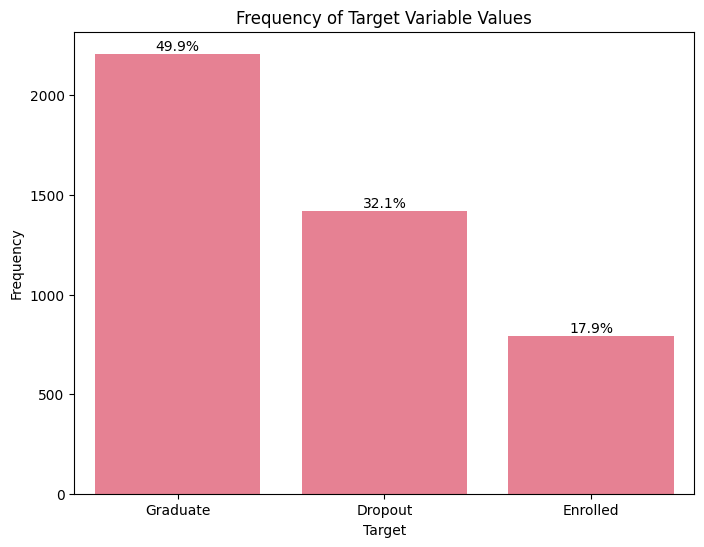

In [28]:
# Calculate the frequency of each target value
target_counts = df['Target'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Frequency of Target Variable Values')
plt.xlabel('Target')
plt.ylabel('Frequency')

# Add percentages over the bars
total = target_counts.sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

Aproximadamente 50% dos alunos estava formado após o término do tempo esperado de curso, 32% deles tinham desistido, enquanto 18% ainda estavam matriculados, tendo sua formatura atrasada

## Análise da variável target por gênero

O gráfico abaixo mostra a incidência de cada um dos valores da variável de interesse para cada subgrupo de gênero

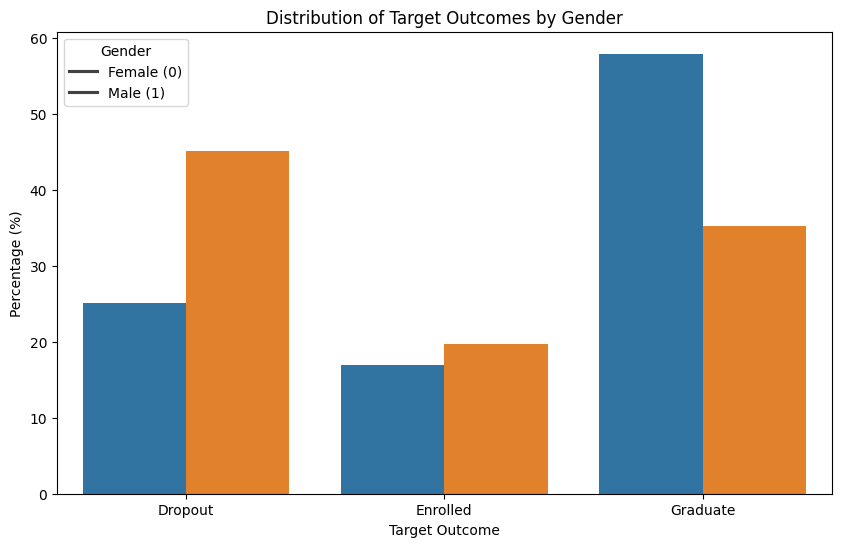

In [5]:
# Calculate percentages within each gender group
gender_target_percent = (df.groupby('Gender')['Target']
                        .value_counts(normalize=True)
                        .mul(100)
                        .reset_index(name='Percentage'))

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_target_percent,
            x='Target',
            y='Percentage',
            hue='Gender',
            order=['Dropout', 'Enrolled', 'Graduate'])  # Optional: specify order

# Customize labels and title
plt.xlabel('Target Outcome')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Target Outcomes by Gender')
plt.legend(title='Gender', labels=['Female (0)', 'Male (1)'])

# Display the plot
plt.show()

In [6]:
# Replace 0 with 'Female' and 1 with 'Male' in the 'Gender' column
gender_target_percent['Gender'] = gender_target_percent['Gender'].replace({0: 'Female', 1: 'Male'})

# Ensure the 'Percentage' column is numeric before formatting
gender_target_percent['Percentage'] = pd.to_numeric(gender_target_percent['Percentage'].astype(str).str.replace('%', ''), errors='coerce')

# Format the Percentage column as whole numbers with '%'
gender_target_percent['Percentage'] = gender_target_percent['Percentage'].round(0).astype(int).astype(str) + '%'

display(gender_target_percent)

,Gender,Target,Percentage
0,Female,Graduate,58%
1,Female,Dropout,25%
2,Female,Enrolled,17%
3,Male,Dropout,45%
4,Male,Graduate,35%
5,Male,Enrolled,20%


É possível ver que o índice de conclusão de curso é radicalmente diferente entre homens e mulheres. sendo de apenas 35% entre os homens e 58% entre as mulheres. O índice de abandono é muito maior entre os homens 45% x 25% entre as mulheres. A frequencia de alunos na situação enrolled (matriculados mas ainda não formados é semelhante 20% entre os homens x 17% entre as mulheres)
Isso demonstra correlação mas não causalidade entre gênero e desempenho acadêmico é possível que o gênero esteja correlacionado com outras variáveis por exemplo: é possível que haja maior incidência masculina nos cursos com maior taca de desistência como ciência da computação (como veremos adiante) e maior incidência feminina em cursos com maior conclusão como enfermagem, também é possível que homens tenham mais propensão a desistir dos estudos para trabalhar e complemetar a renda doméstica.
Quando construirmos o modelo com todas as variáveis, poderemos eliminar correlação com outras variáveis e o esperado é que o genêro tenha um impacto menor, porém ainda estatísticamente significativo

## Análise da variável alvo por idade dos alunos

O Gráfico abaixo mostra a % de conclusão de curso por idade dos alunos na data de matrícula

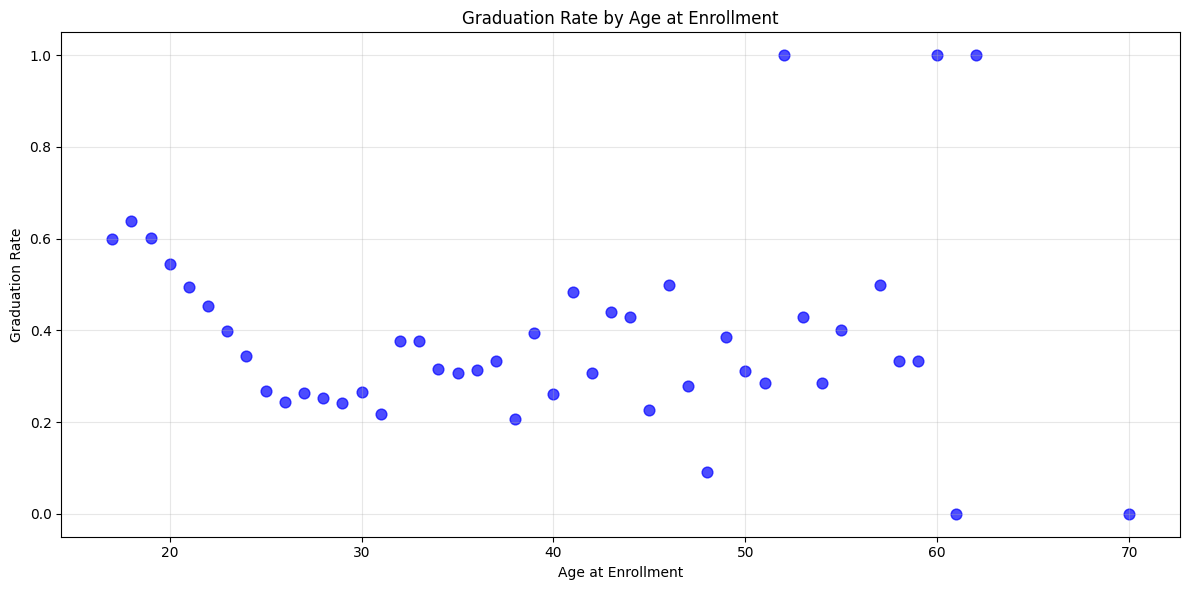

In [7]:
# Create a binary column for graduation (1 for Graduate, 0 for others)
df['Graduated'] = (df['Target'] == 'Graduate').astype(int)

# Group by age and calculate graduation rate
age_graduation = df.groupby('Age at enrollment')['Graduated'].mean().reset_index()
age_graduation.columns = ['Age', 'Graduation_Rate']

# Create scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(age_graduation['Age'], age_graduation['Graduation_Rate'],
           alpha=0.7, s=60, color='blue')

# Customize the plot
plt.xlabel('Age at Enrollment')
plt.ylabel('Graduation Rate')
plt.title('Graduation Rate by Age at Enrollment')
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

É possível observar que a correlação enre idade e % de graduação tem uma relação não linear entre os 18 e 30 segue uma tendência mais ou menos linear descendente mas depois se torna mais caótica. Para lidar com essa questão, na etapa de pré processamentos, iremos seguir a estratégia de criar uma 3 variáveis binárias, visando dividir os alunos em 4 grupos etários. Podemos ver que acima dos 50 anos temos alguns outliers, valores de idade com 100% e 0% de graduação, provavelmente pelo fato de termos poucos alunos mais velhos na amostra. A estratégia de dividir em faixas etárias nos permite lidar com esses outliers sem precisar remover eles da amostra

## Análise da variável alvo por curso

Os gráficos abaixo exploram a relação entre a frequência de alunos graduados e o curso de graduação do aluno em questão

ANALYZING GRADUATION RATES BY COURSE
Course variable in original df:
Unique course values: [np.int64(33), np.int64(171), np.int64(8014), np.int64(9003), np.int64(9070), np.int64(9085), np.int64(9119), np.int64(9130), np.int64(9147), np.int64(9238), np.int64(9254), np.int64(9500), np.int64(9556), np.int64(9670), np.int64(9773), np.int64(9853), np.int64(9991)]
Number of unique courses: 17

Graduation rates by course (sorted by highest rate):
                             Course Name  Graduation Rate (%)  Student Count
11                               Nursing                71.54            766
13                        Social Service                69.86            355
8           Journalism and Communication                59.21            331
5                   Communication Design                58.85            226
14   Social Service (evening attendance)                57.21            215
16                    Veterinary Nursing                51.04            337
0   Advertising a

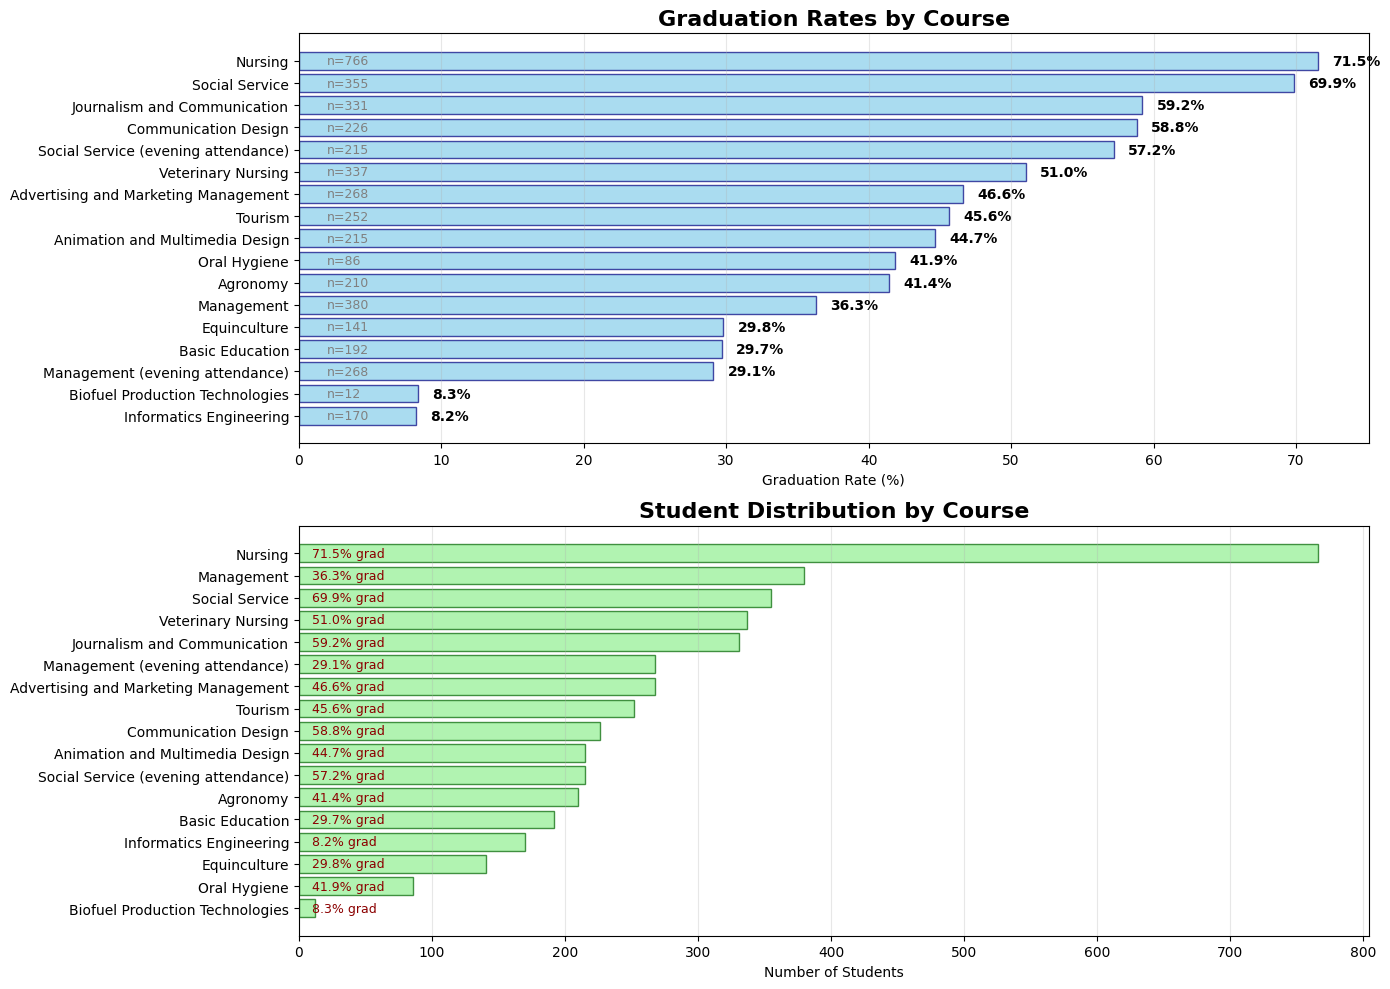


STATISTICAL SUMMARY OF GRADUATION RATES BY COURSE
Overall graduation rate: 49.9%
Highest graduation rate: 71.5%
Lowest graduation rate: 8.2%
Average course graduation rate: 42.9%
Standard deviation: 18.3%

Correlation between course size and graduation rate: 0.659


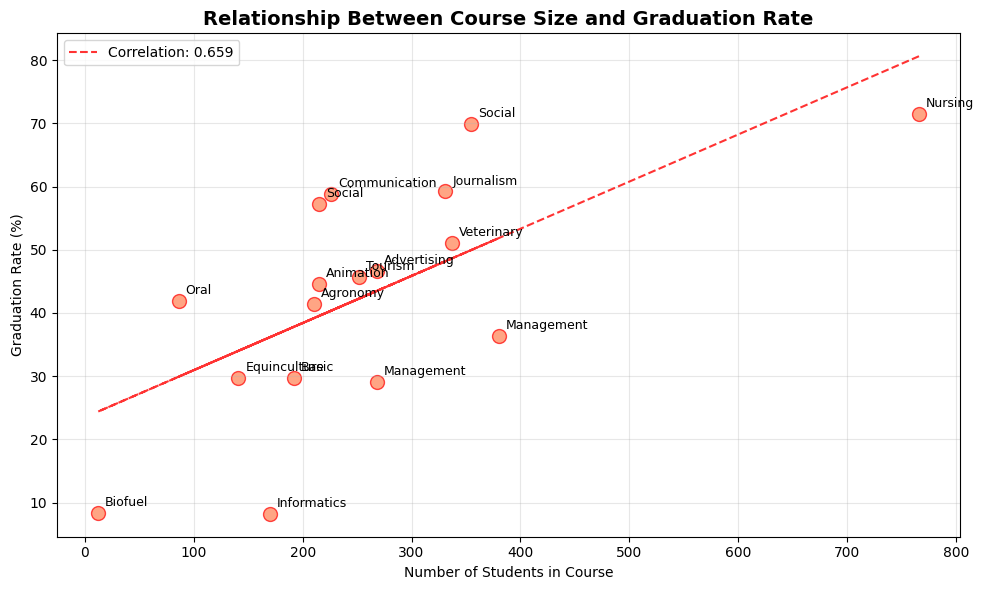


KEY INSIGHTS
Top 3 courses by graduation rate:
  Nursing: 71.5%
  Social Service: 69.9%
  Journalism and Communication: 59.2%

Bottom 3 courses by graduation rate:
  Management (evening attendance): 29.1%
  Biofuel Production Technologies: 8.3%
  Informatics Engineering: 8.2%

Courses with above-average enrollment AND graduation rates:
  Nursing: 71.5% grad, 766 students
  Social Service: 69.9% grad, 355 students
  Journalism and Communication: 59.2% grad, 331 students
  Veterinary Nursing: 51.0% grad, 337 students
  Advertising and Marketing Management: 46.6% grad, 268 students
  Tourism: 45.6% grad, 252 students


In [8]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

print("="*60)
print("ANALYZING GRADUATION RATES BY COURSE")
print("="*60)

# First, let's check the course variable in the original dataframe
print("Course variable in original df:")
print(f"Unique course values: {sorted(df['Course'].unique())}")
print(f"Number of unique courses: {df['Course'].nunique()}")

# Map course codes to course names based on your variable dictionary
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

# Create a copy of the dataframe with course names
df_course_analysis = df.copy()
df_course_analysis['Course Name'] = df_course_analysis['Course'].map(course_mapping)

# Check if any courses weren't mapped
unmapped_courses = df_course_analysis[df_course_analysis['Course Name'].isna()]['Course'].unique()
if len(unmapped_courses) > 0:
    print(f"Unmapped course codes: {unmapped_courses}")
    # For unmapped courses, use the code as name
    for course_code in unmapped_courses:
        df_course_analysis.loc[df_course_analysis['Course'] == course_code, 'Course Name'] = f'Course {course_code}'

# Calculate graduation rates by course
course_graduation = df_course_analysis.groupby('Course Name')['Target'].apply(
    lambda x: (x == 'Graduate').sum() / len(x) * 100
).reset_index()
course_graduation.columns = ['Course Name', 'Graduation Rate (%)']

# Add student count per course
course_counts = df_course_analysis['Course Name'].value_counts().reset_index()
course_counts.columns = ['Course Name', 'Student Count']
course_graduation = course_graduation.merge(course_counts, on='Course Name')

# Sort by graduation rate for better visualization
course_graduation = course_graduation.sort_values('Graduation Rate (%)', ascending=False)

print(f"\nGraduation rates by course (sorted by highest rate):")
print(course_graduation.round(2))

# Create the bar plot
plt.figure(figsize=(14, 10))

# Plot 1: Graduation rates by course (main plot)
plt.subplot(2, 1, 1)
bars = plt.barh(course_graduation['Course Name'], course_graduation['Graduation Rate (%)'],
                color='skyblue', edgecolor='navy', alpha=0.7)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center', fontweight='bold')

plt.xlabel('Graduation Rate (%)')
plt.title('Graduation Rates by Course', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Highest rate at top
plt.grid(axis='x', alpha=0.3)

# Add student count as text on the left
for i, (course, count) in enumerate(zip(course_graduation['Course Name'], course_graduation['Student Count'])):
    plt.text(2, i, f'n={count}', va='center', ha='left', fontsize=9, color='gray')

# Plot 2: Student distribution by course
plt.subplot(2, 1, 2)
# Sort by student count for this plot
course_by_count = course_graduation.sort_values('Student Count', ascending=False)
plt.barh(course_by_count['Course Name'], course_by_count['Student Count'],
         color='lightgreen', edgecolor='darkgreen', alpha=0.7)

plt.xlabel('Number of Students')
plt.title('Student Distribution by Course', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add graduation rate as text
for i, (course, rate) in enumerate(zip(course_by_count['Course Name'], course_by_count['Graduation Rate (%)'])):
    plt.text(10, i, f'{rate:.1f}% grad', va='center', ha='left', fontsize=9, color='darkred')

plt.tight_layout()
plt.show()

# Additional analysis: Statistical summary
print("\n" + "="*60)
print("STATISTICAL SUMMARY OF GRADUATION RATES BY COURSE")
print("="*60)

print(f"Overall graduation rate: { (df['Target'] == 'Graduate').mean() * 100:.1f}%")
print(f"Highest graduation rate: {course_graduation['Graduation Rate (%)'].max():.1f}%")
print(f"Lowest graduation rate: {course_graduation['Graduation Rate (%)'].min():.1f}%")
print(f"Average course graduation rate: {course_graduation['Graduation Rate (%)'].mean():.1f}%")
print(f"Standard deviation: {course_graduation['Graduation Rate (%)'].std():.1f}%")

# Identify outliers (courses with unusually high/low graduation rates)
q1 = course_graduation['Graduation Rate (%)'].quantile(0.25)
q3 = course_graduation['Graduation Rate (%)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outlier_courses = course_graduation[
    (course_graduation['Graduation Rate (%)'] < lower_bound) |
    (course_graduation['Graduation Rate (%)'] > upper_bound)
]

if not outlier_courses.empty:
    print(f"\nOutlier courses (unusually high/low graduation rates):")
    for _, row in outlier_courses.iterrows():
        status = "HIGH" if row['Graduation Rate (%)'] > upper_bound else "LOW"
        print(f"  {row['Course Name']}: {row['Graduation Rate (%)']:.1f}% ({status})")

# Correlation between course size and graduation rate
correlation = course_graduation['Student Count'].corr(course_graduation['Graduation Rate (%)'])
print(f"\nCorrelation between course size and graduation rate: {correlation:.3f}")

# Create a scatter plot to show this relationship
plt.figure(figsize=(10, 6))
plt.scatter(course_graduation['Student Count'], course_graduation['Graduation Rate (%)'],
            s=100, alpha=0.7, color='coral', edgecolor='red')

# Add course labels
for i, row in course_graduation.iterrows():
    plt.annotate(row['Course Name'].split()[0],  # Use first word of course name
                (row['Student Count'], row['Graduation Rate (%)']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Number of Students in Course')
plt.ylabel('Graduation Rate (%)')
plt.title('Relationship Between Course Size and Graduation Rate', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add correlation line if significant
if abs(correlation) > 0.3:
    z = np.polyfit(course_graduation['Student Count'], course_graduation['Graduation Rate (%)'], 1)
    p = np.poly1d(z)
    plt.plot(course_graduation['Student Count'], p(course_graduation['Student Count']),
             "r--", alpha=0.8, label=f'Correlation: {correlation:.3f}')
    plt.legend()

plt.tight_layout()
plt.show()

# Final insights
print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)

# Top 3 and bottom 3 courses
top_3 = course_graduation.head(3)
bottom_3 = course_graduation.tail(3)

print("Top 3 courses by graduation rate:")
for _, row in top_3.iterrows():
    print(f"  {row['Course Name']}: {row['Graduation Rate (%)']:.1f}%")

print("\nBottom 3 courses by graduation rate:")
for _, row in bottom_3.iterrows():
    print(f"  {row['Course Name']}: {row['Graduation Rate (%)']:.1f}%")

# Courses with significant enrollment and high graduation rates
significant_courses = course_graduation[course_graduation['Student Count'] > course_graduation['Student Count'].median()]
high_performing = significant_courses[significant_courses['Graduation Rate (%)'] > course_graduation['Graduation Rate (%)'].median()]

if not high_performing.empty:
    print(f"\nCourses with above-average enrollment AND graduation rates:")
    for _, row in high_performing.iterrows():
        print(f"  {row['Course Name']}: {row['Graduation Rate (%)']:.1f}% grad, {row['Student Count']} students")

Podemos ver que o curso do aluno influencia bastante na probabilidade de graduação no curso emnquanto informática e Biocombustíveis tem apenas 8% dos seus alunos se formando no tempo previsto, alguns cursos como enfermagem e serviço social tem frequência de graduação superior a 70%. Isso por si só já serve como um guia para a equipe que for formular as estratégias de intervenção acadêmica, fazendo sentido focar os esforços primeiramente nos cinco cursos com menor taxa de graduação

## Análise do índice de graduação por estado civíl

O gráfico abaixo mostra o índice de graduação por status civil

GRADUATION RATES BY MARITAL STATUS
      Marital Status  Graduation Rate (%)  Student Count
0             Single                51.42           3919
4        Facto Union                44.00             25
1            Married                39.05            379
3           Divorced                36.26             91
2            Widower                25.00              4
5  Legally Separated                16.67              6


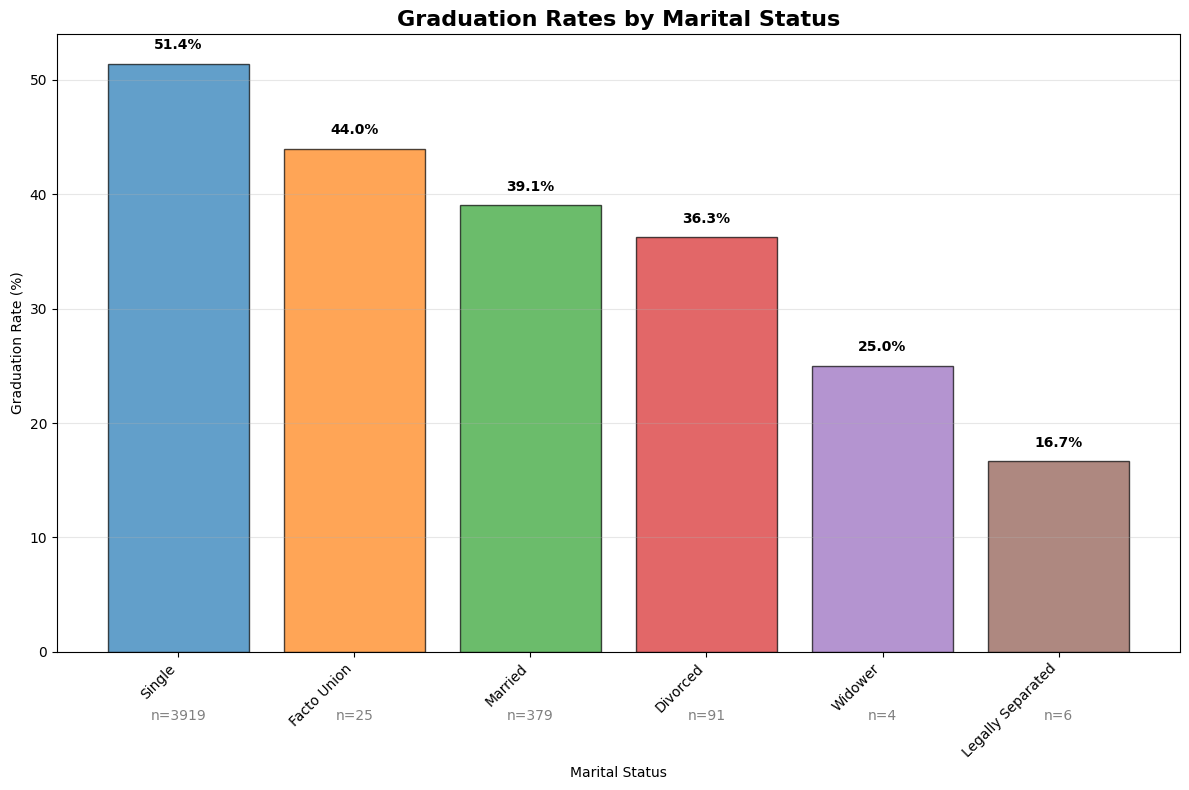


Marital Status Graduation Rate Range: 16.7% - 51.4%
Average: 35.4%


In [9]:
# Chart 1: Graduation Rates by Marital Status
print("="*60)
print("GRADUATION RATES BY MARITAL STATUS")
print("="*60)

# Map marital status codes to meaningful names
marital_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto Union',
    6: 'Legally Separated'
}

# Calculate graduation rates by marital status
marital_graduation = df.groupby('Marital status')['Target'].apply(
    lambda x: (x == 'Graduate').sum() / len(x) * 100
).reset_index()
marital_graduation.columns = ['Marital Code', 'Graduation Rate (%)']

# Add marital status names and student counts
marital_graduation['Marital Status'] = marital_graduation['Marital Code'].map(marital_mapping)
marital_counts = df['Marital status'].value_counts().reset_index()
marital_counts.columns = ['Marital Code', 'Student Count']
marital_graduation = marital_graduation.merge(marital_counts, on='Marital Code')

# Sort by graduation rate
marital_graduation = marital_graduation.sort_values('Graduation Rate (%)', ascending=False)

print(marital_graduation[['Marital Status', 'Graduation Rate (%)', 'Student Count']].round(2))

# Create the plot
plt.figure(figsize=(12, 8))
bars = plt.bar(marital_graduation['Marital Status'], marital_graduation['Graduation Rate (%)'],
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'],
               alpha=0.7, edgecolor='black')

plt.xlabel('Marital Status')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rates by Marital Status', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Add student count below each bar
for i, (status, count) in enumerate(zip(marital_graduation['Marital Status'], marital_graduation['Student Count'])):
    plt.text(i, -5, f'n={count}', ha='center', va='top', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

# Statistical summary
print(f"\nMarital Status Graduation Rate Range: {marital_graduation['Graduation Rate (%)'].min():.1f}% - {marital_graduation['Graduation Rate (%)'].max():.1f}%")
print(f"Average: {marital_graduation['Graduation Rate (%)'].mean():.1f}%")

Podemos observar que há uma maior incidência de graduação entre alunos solteiros, 51% x 39% entre casados e 36,3% entre divorciados, o que é de se esperar uma vêz que solteiros tem menos chances de terem obrigações familiares, filhos etc. Note que é possível que alunos solteiros tenham mais chance de estar na faixa mais jovem, que como observamos tem maior incidência de graduação. Vale a pena observar também que o n das categorias  viúvos e legally separated é bem baixo o que pode ter afetado os resultados.

## Análise do índice de graduação por nacionalidade do aluno

Os gráficos abaixo analisam a relação entre a nacionalidade dos alunos e o índice de graduação. Vale a pena a ressalva de que os dados utilizados são de uma universidade de Portugal, então naturalmente os alunos portugueses são a imensa maioria da amostra

GRADUATION RATES BY NATIONALITY (WITH 'OTHER' CATEGORY)
Table: Nationalities Sorted by Number of Students (Including 'Other' Category)
Country                   Student Count   Graduation Rate (%) 
---------------------------------------------------------------------------
Portuguese                4314            50.0                
Brazilian                 38              47.4                
Other (Combined)          32              50.0                
Santomean                 14              57.1                
Spanish                   13              30.8                
Cape Verdean              13              61.5                


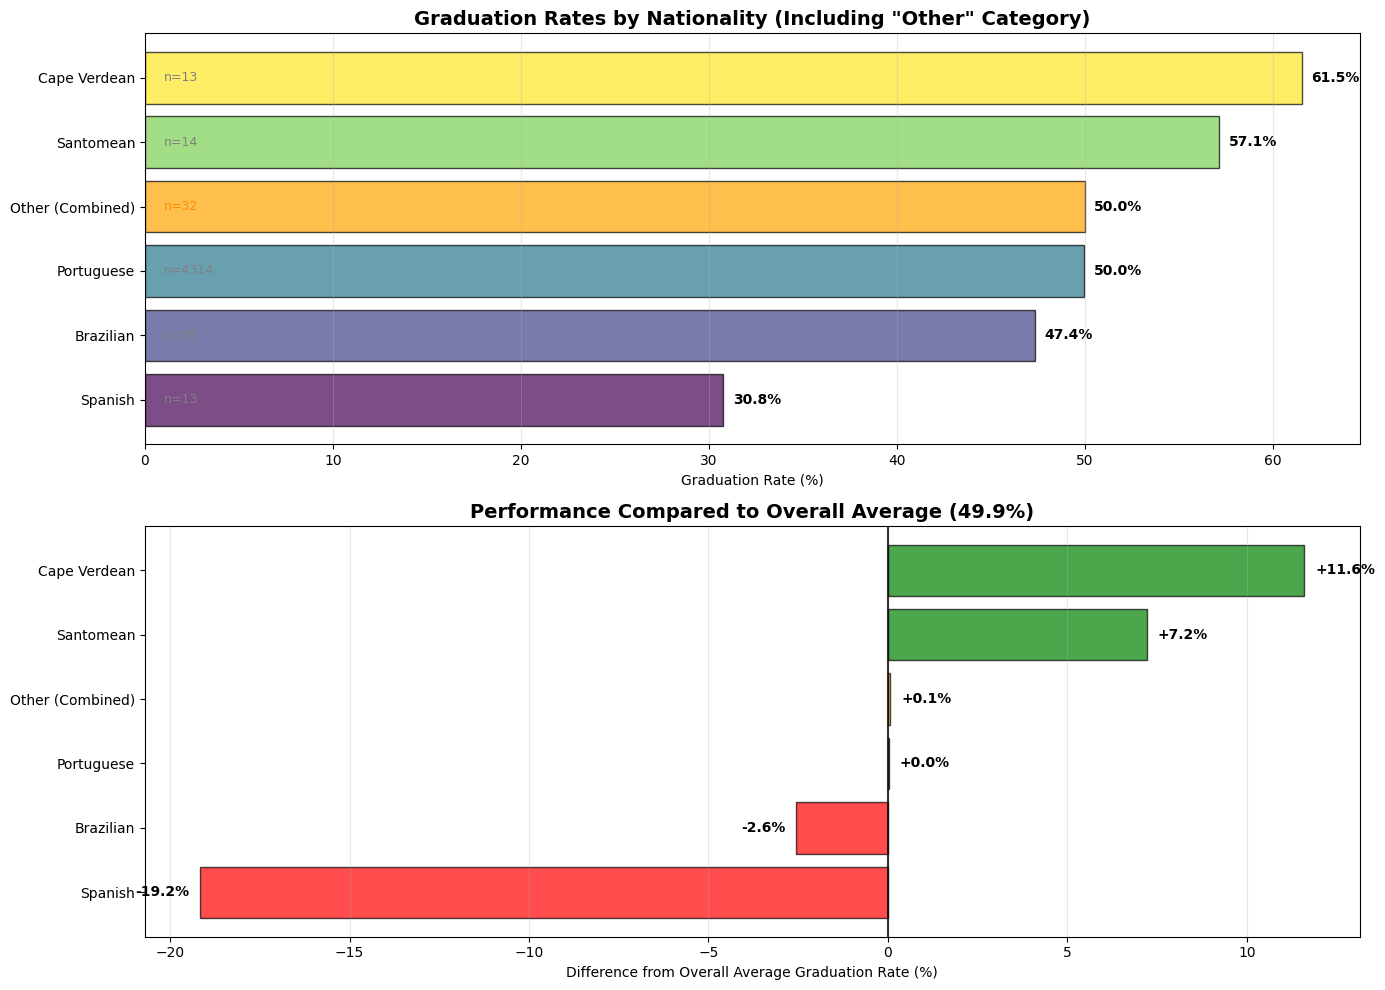


KEY INSIGHTS BY NATIONALITY (INCLUDING 'OTHER' CATEGORY)
Top 3 nationalities by graduation rate:
  Cape Verdean: 61.5% (13 students)
  Santomean: 57.1% (14 students)
  Other (Combined): 50.0% (32 students)

Bottom 3 nationalities by graduation rate:
  Spanish: 30.8% (13 students)
  Brazilian: 47.4% (38 students)
  Portuguese: 50.0% (4314 students)

Portuguese students: 50.0% graduation rate
Other nationalities average: 49.4% graduation rate
Difference: +0.6%

'Other' Category Details:
  Combines 16 nationalities with 10 or fewer students each
  Total students in 'Other' category: 32
  Weighted average graduation rate: 50.0%

  Composition of 'Other' category:
    Guinean: 5 students, 80.0% graduation
    Italian: 3 students, 100.0% graduation
    Ukrainian: 3 students, 66.7% graduation
    Moldova (Republic of): 3 students, 0.0% graduation
    Mozambican: 2 students, 50.0% graduation
    Mexican: 2 students, 50.0% graduation
    Angolan: 2 students, 0.0% graduation
    German: 2 stude

In [10]:
# Chart 2: Graduation Rates by Nationality (Including "Other" Category)
print("="*60)
print("GRADUATION RATES BY NATIONALITY (WITH 'OTHER' CATEGORY)")
print("="*60)

# Nationality mapping from your variable dictionary
nationality_mapping = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}

# Calculate graduation rates by nationality
nationality_graduation = df.groupby('Nacionality')['Target'].apply(
    lambda x: (x == 'Graduate').sum() / len(x) * 100
).reset_index()
nationality_graduation.columns = ['Nationality Code', 'Graduation Rate (%)']

# Add country names and student counts
nationality_graduation['Country'] = nationality_graduation['Nationality Code'].map(nationality_mapping)
# For any unmapped codes, use the code as the name
nationality_graduation['Country'] = nationality_graduation.apply(
    lambda x: x['Country'] if pd.notna(x['Country']) else f'Country Code {x["Nationality Code"]}', axis=1
)

nationality_counts = df['Nacionality'].value_counts().reset_index()
nationality_counts.columns = ['Nationality Code', 'Student Count']
nationality_graduation = nationality_graduation.merge(nationality_counts, on='Nationality Code')

# Separate nationalities with >10 students and <=10 students
significant_nationalities = nationality_graduation[nationality_graduation['Student Count'] > 10].copy()
small_nationalities = nationality_graduation[nationality_graduation['Student Count'] <= 10].copy()

# Create "Other" category from small nationalities
if not small_nationalities.empty:
    # Calculate weighted average graduation rate for "Other" category
    total_small_students = small_nationalities['Student Count'].sum()
    weighted_graduation_rate = (small_nationalities['Graduation Rate (%)'] * small_nationalities['Student Count']).sum() / total_small_students

    other_category = pd.DataFrame({
        'Nationality Code': ['Other'],
        'Graduation Rate (%)': [weighted_graduation_rate],
        'Country': ['Other (Combined)'],
        'Student Count': [total_small_students]
    })

    # Combine significant nationalities with "Other" category
    combined_nationalities = pd.concat([significant_nationalities, other_category], ignore_index=True)
else:
    combined_nationalities = significant_nationalities.copy()

# Sort by student count (descending) for the table
combined_table = combined_nationalities.sort_values('Student Count', ascending=False)

print("Table: Nationalities Sorted by Number of Students (Including 'Other' Category)")
print("="*75)
print(f"{'Country':<25} {'Student Count':<15} {'Graduation Rate (%)':<20}")
print("-" * 75)
for _, row in combined_table.iterrows():
    print(f"{row['Country']:<25} {row['Student Count']:<15} {row['Graduation Rate (%)']:<20.1f}")

print("="*75)

# Create the visualization with "Other" category included
plt.figure(figsize=(14, 10))

# Plot 1: Graduation rates for all categories including "Other"
plt.subplot(2, 1, 1)
# Sort by graduation rate for better visualization
plot_data = combined_nationalities.sort_values('Graduation Rate (%)', ascending=True)

# Use different color for "Other" category
colors = []
for country in plot_data['Country']:
    if country == 'Other (Combined)':
        colors.append('orange')  # Distinct color for "Other"
    else:
        colors.append(plt.cm.viridis(np.linspace(0, 1, len(plot_data)))[list(plot_data['Country']).index(country)]) # Added closing parenthesis here

bars = plt.barh(plot_data['Country'], plot_data['Graduation Rate (%)'],
               color=colors, alpha=0.7, edgecolor='black')

plt.xlabel('Graduation Rate (%)')
plt.title('Graduation Rates by Nationality (Including "Other" Category)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center', fontweight='bold')

# Add student count on the left side
for i, (country, count) in enumerate(zip(plot_data['Country'], plot_data['Student Count'])):
    plt.text(1, i, f'n={count}', ha='left', va='center', fontsize=9,
             color='darkorange' if country == 'Other (Combined)' else 'gray')

# Plot 2: Comparison with overall average
plt.subplot(2, 1, 2)
overall_graduation_rate = (df['Target'] == 'Graduate').mean() * 100

# Calculate difference from overall average
plot_data['Difference from Average'] = plot_data['Graduation Rate (%)'] - overall_graduation_rate
plot_data = plot_data.sort_values('Difference from Average', ascending=True)

colors = []
for i, row in plot_data.iterrows():
    if row['Country'] == 'Other (Combined)':
        colors.append('orange')  # Distinct color for "Other"
    else:
        colors.append('red' if row['Difference from Average'] < 0 else 'green')

bars = plt.barh(plot_data['Country'], plot_data['Difference from Average'],
               color=colors, alpha=0.7, edgecolor='black')

plt.axvline(x=0, color='black', linestyle='-', alpha=0.8)
plt.xlabel('Difference from Overall Average Graduation Rate (%)')
plt.title('Performance Compared to Overall Average (49.9%)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ha = 'left' if width > 0 else 'right'
    x_pos = width + 0.3 if width > 0 else width - 0.3
    plt.text(x_pos, bar.get_y() + bar.get_height()/2,
             f'{width:+.1f}%', ha=ha, va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed analysis including the "Other" category
print("\n" + "="*60)
print("KEY INSIGHTS BY NATIONALITY (INCLUDING 'OTHER' CATEGORY)")
print("="*60)

# Top and bottom performers including "Other"
top_3 = combined_nationalities.nlargest(3, 'Graduation Rate (%)')
bottom_3 = combined_nationalities.nsmallest(3, 'Graduation Rate (%)')

print("Top 3 nationalities by graduation rate:")
for _, row in top_3.iterrows():
    print(f"  {row['Country']}: {row['Graduation Rate (%)']:.1f}% ({row['Student Count']} students)")

print("\nBottom 3 nationalities by graduation rate:")
for _, row in bottom_3.iterrows():
    print(f"  {row['Country']}: {row['Graduation Rate (%)']:.1f}% ({row['Student Count']} students)")

# Portuguese students analysis
portuguese_data = combined_nationalities[combined_nationalities['Country'] == 'Portuguese']
if not portuguese_data.empty:
    portuguese_rate = portuguese_data['Graduation Rate (%)'].values[0]
    other_nationalities_avg = combined_nationalities[combined_nationalities['Country'] != 'Portuguese']['Graduation Rate (%)'].mean()

    print(f"\nPortuguese students: {portuguese_rate:.1f}% graduation rate")
    print(f"Other nationalities average: {other_nationalities_avg:.1f}% graduation rate")
    print(f"Difference: {portuguese_rate - other_nationalities_avg:+.1f}%")

# "Other" category details
if not small_nationalities.empty:
    print(f"\n'Other' Category Details:")
    print(f"  Combines {len(small_nationalities)} nationalities with 10 or fewer students each")
    print(f"  Total students in 'Other' category: {small_nationalities['Student Count'].sum()}")
    print(f"  Weighted average graduation rate: {combined_nationalities[combined_nationalities['Country'] == 'Other (Combined)']['Graduation Rate (%)'].values[0]:.1f}%")

    # Show the composition of "Other" category
    print(f"\n  Composition of 'Other' category:")
    small_sorted = small_nationalities.sort_values('Student Count', ascending=False)
    for _, row in small_sorted.iterrows():
        print(f"    {row['Country']}: {row['Student Count']} students, {row['Graduation Rate (%)']:.1f}% graduation")

# Statistical summary
print(f"\nStatistical Summary for {len(combined_nationalities)} categories:")
print(f"Range: {combined_nationalities['Graduation Rate (%)'].min():.1f}% - {combined_nationalities['Graduation Rate (%)'].max():.1f}%")
print(f"Average: {combined_nationalities['Graduation Rate (%)'].mean():.1f}%")
print(f"Standard Deviation: {combined_nationalities['Graduation Rate (%)'].std():.1f}%")

# Check if "Other" category is an outlier
q1 = combined_nationalities['Graduation Rate (%)'].quantile(0.25)
q3 = combined_nationalities['Graduation Rate (%)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

other_rate = combined_nationalities[combined_nationalities['Country'] == 'Other (Combined)']['Graduation Rate (%)']
if not other_rate.empty:
    other_rate_value = other_rate.values[0]
    if other_rate_value < lower_bound or other_rate_value > upper_bound:
        status = "HIGH OUTLIER" if other_rate_value > upper_bound else "LOW OUTLIER"
        print(f"\n⚠️  The 'Other' category is a statistical {status}")
        print(f"   Graduation rate: {other_rate_value:.1f}% vs expected range: [{lower_bound:.1f}%, {upper_bound:.1f}%]")

Podemos observar que a alunos de são tomé e cabo verde tem probabilidade de graduação maior do que dos próprios nativos, os portugueses. Existem várias possíveis explicações, talvez os alunos destes países sejam atraídos por cursos com maior índice de graduação, ou talvez os alunos destes países que venham estudar na universidade em questão tenham condições sociais particularmente vantajosas (membros das elites desses países mandam seus filhos para estudar no exterior) ou talvez alunos destes países recebam bolsas de estudo (o que tem impacto nos índices de graduação como veremos mais a frente). Vale a pena frisar que ambos são países de língua portuguesa.
Alunos Brasileiros tiveram índice de graduação marginalmente menor que dos portugueses, mas a diferença é pequena e provavelmente não estatatísticamente relevante, por hora, não faremos testes estatísticos.  Já os alunos esponhóis tem % de graduação significativamente menor do que a média. Isso tem várias explicações potenciais como a Barreira linguística ou a preferência por cursos com maior índice de reprovação. De qualquer maneira é um dado que chama a atenção

## Análise do índice de graduação por horário do curso

Os gráficos abaixo relacionam o horário do curso (manhã x noite) com o índice de graduação

GRADUATION RATES BY DAYTIME/EVENING ATTENDANCE
  Attendance Type  Graduation Rate (%)  Student Count
0         Evening                41.61            483
1         Daytime                50.95           3941


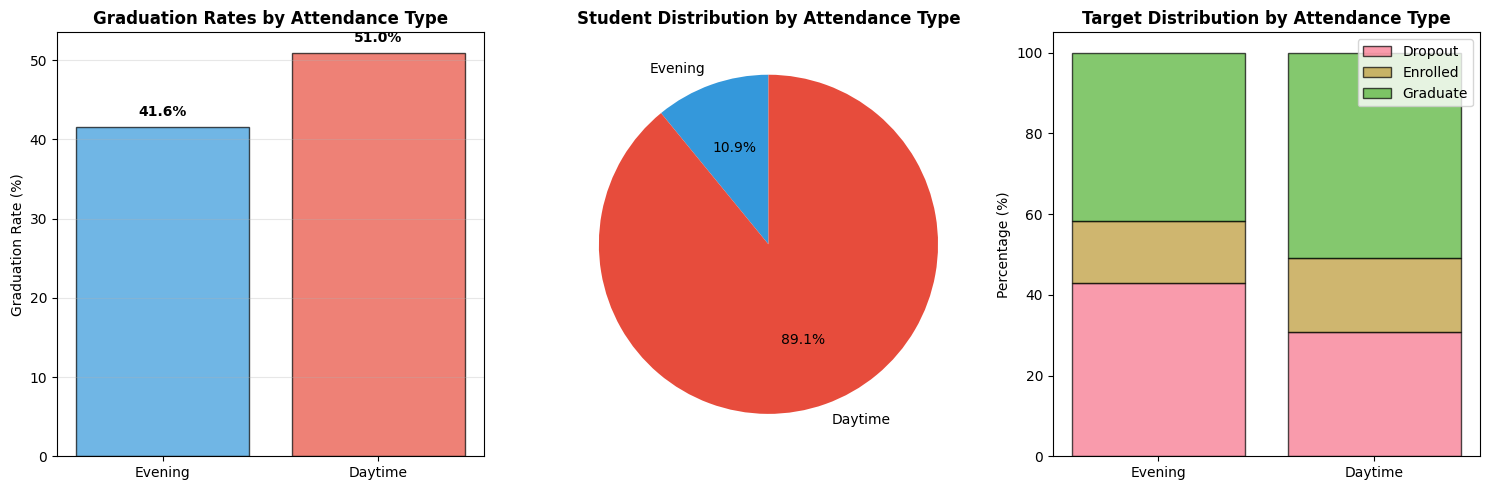


DETAILED ANALYSIS:
Daytime students: 3941
Evening students: 483
Ratio: 8.16:1

Graduation rate difference: +9.3%
This suggests a meaningful difference in graduation rates between attendance types.

COMBINED INSIGHTS:
Average age - Daytime: 22.0, Evening: 33.3
Debtors - Daytime: 11.4%, Evening: 10.8%


In [11]:
# Chart 3: Graduation Rates by Daytime/Evening Attendance
print("="*60)
print("GRADUATION RATES BY DAYTIME/EVENING ATTENDANCE")
print("="*60)

# Map attendance codes to meaningful names
attendance_mapping = {
    1: 'Daytime',
    0: 'Evening'
}

# Calculate graduation rates by attendance
attendance_graduation = df.groupby('Daytime/evening attendance\t')['Target'].apply(
    lambda x: (x == 'Graduate').sum() / len(x) * 100
).reset_index()
attendance_graduation.columns = ['Attendance Code', 'Graduation Rate (%)']

# Add attendance names and student counts
attendance_graduation['Attendance Type'] = attendance_graduation['Attendance Code'].map(attendance_mapping)
attendance_counts = df['Daytime/evening attendance\t'].value_counts().reset_index()
attendance_counts.columns = ['Attendance Code', 'Student Count']
attendance_graduation = attendance_graduation.merge(attendance_counts, on='Attendance Code')

print(attendance_graduation[['Attendance Type', 'Graduation Rate (%)', 'Student Count']].round(2))

# Create a comprehensive plot
plt.figure(figsize=(15, 5))

# Plot 1: Graduation rate comparison
plt.subplot(1, 3, 1)
colors = ['#3498db', '#e74c3c']  # Blue for daytime, red for evening
bars = plt.bar(attendance_graduation['Attendance Type'], attendance_graduation['Graduation Rate (%)'],
               color=colors, alpha=0.7, edgecolor='black')

plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rates by Attendance Type', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Student distribution
plt.subplot(1, 3, 2)
plt.pie(attendance_graduation['Student Count'], labels=attendance_graduation['Attendance Type'],
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Student Distribution by Attendance Type', fontweight='bold')

# Plot 3: Target distribution within each attendance type
plt.subplot(1, 3, 3)
attendance_target = pd.crosstab(df['Daytime/evening attendance\t'], df['Target'])
attendance_target_percentage = attendance_target.div(attendance_target.sum(axis=1), axis=0) * 100

# Create stacked bar chart
attendance_types = [attendance_mapping[code] for code in attendance_target.index]
bottom = np.zeros(len(attendance_types))

for i, target in enumerate(['Dropout', 'Enrolled', 'Graduate']):
    plt.bar(attendance_types, attendance_target_percentage[target], bottom=bottom,
            label=target, alpha=0.7, edgecolor='black')
    bottom += attendance_target_percentage[target]

plt.ylabel('Percentage (%)')
plt.title('Target Distribution by Attendance Type', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

# Detailed analysis
print(f"\nDETAILED ANALYSIS:")
daytime_data = df[df['Daytime/evening attendance\t'] == 1]
evening_data = df[df['Daytime/evening attendance\t'] == 0]

print(f"Daytime students: {len(daytime_data)}")
print(f"Evening students: {len(evening_data)}")
print(f"Ratio: {len(daytime_data)/len(evening_data):.2f}:1")

# Statistical significance test (simplified)
daytime_grad_rate = (daytime_data['Target'] == 'Graduate').mean() * 100
evening_grad_rate = (evening_data['Target'] == 'Graduate').mean() * 100
difference = daytime_grad_rate - evening_grad_rate

print(f"\nGraduation rate difference: {difference:+.1f}%")
if abs(difference) > 5:  # Arbitrary threshold for "meaningful" difference
    print("This suggests a meaningful difference in graduation rates between attendance types.")
else:
    print("The difference in graduation rates between attendance types appears minimal.")

# Additional insights by combining with other factors
print(f"\nCOMBINED INSIGHTS:")
# Check if evening students have different demographic profiles
evening_avg_age = evening_data['Age at enrollment'].mean()
daytime_avg_age = daytime_data['Age at enrollment'].mean()
print(f"Average age - Daytime: {daytime_avg_age:.1f}, Evening: {evening_avg_age:.1f}")

# Employment status (if available in data)
if 'Debtor' in df.columns:
    evening_debtors = evening_data['Debtor'].mean() * 100
    daytime_debtors = daytime_data['Debtor'].mean() * 100
    print(f"Debtors - Daytime: {daytime_debtors:.1f}%, Evening: {evening_debtors:.1f}%")

é possível observar que o índice de graduação é de até 9,3% maior enre os estudantes do turno da manhã. Podemos ver que a idade média dos alunos é 11 anos maior o que por si só ja é uma explicação. Além disso, alunos do turno da noite tem uma maior probabilidade de trabalhar durante o curso o que aumenta a probabilidade de desistência. é importante ressaltar que os dados estão desbalanceados, uma vez que os alunos do turno da noite são um pouco mais de 10% da amostra

## Análise do índice de graduação entre estudantes bolsistas x não bolsistas

Os gráficos abaixo analisam o índice de graduação entre alunos bolsistas e não bolsistas

GRADUATION RATES BY SCHOLARSHIP HOLDER STATUS
Table: Graduation Rates by Scholarship Status
Scholarship Status        Student Count   Graduation Rate (%) 
-----------------------------------------------------------------
Non-Scholarship Holder    3325            41.3                
Scholarship Holder        1099            76.0                


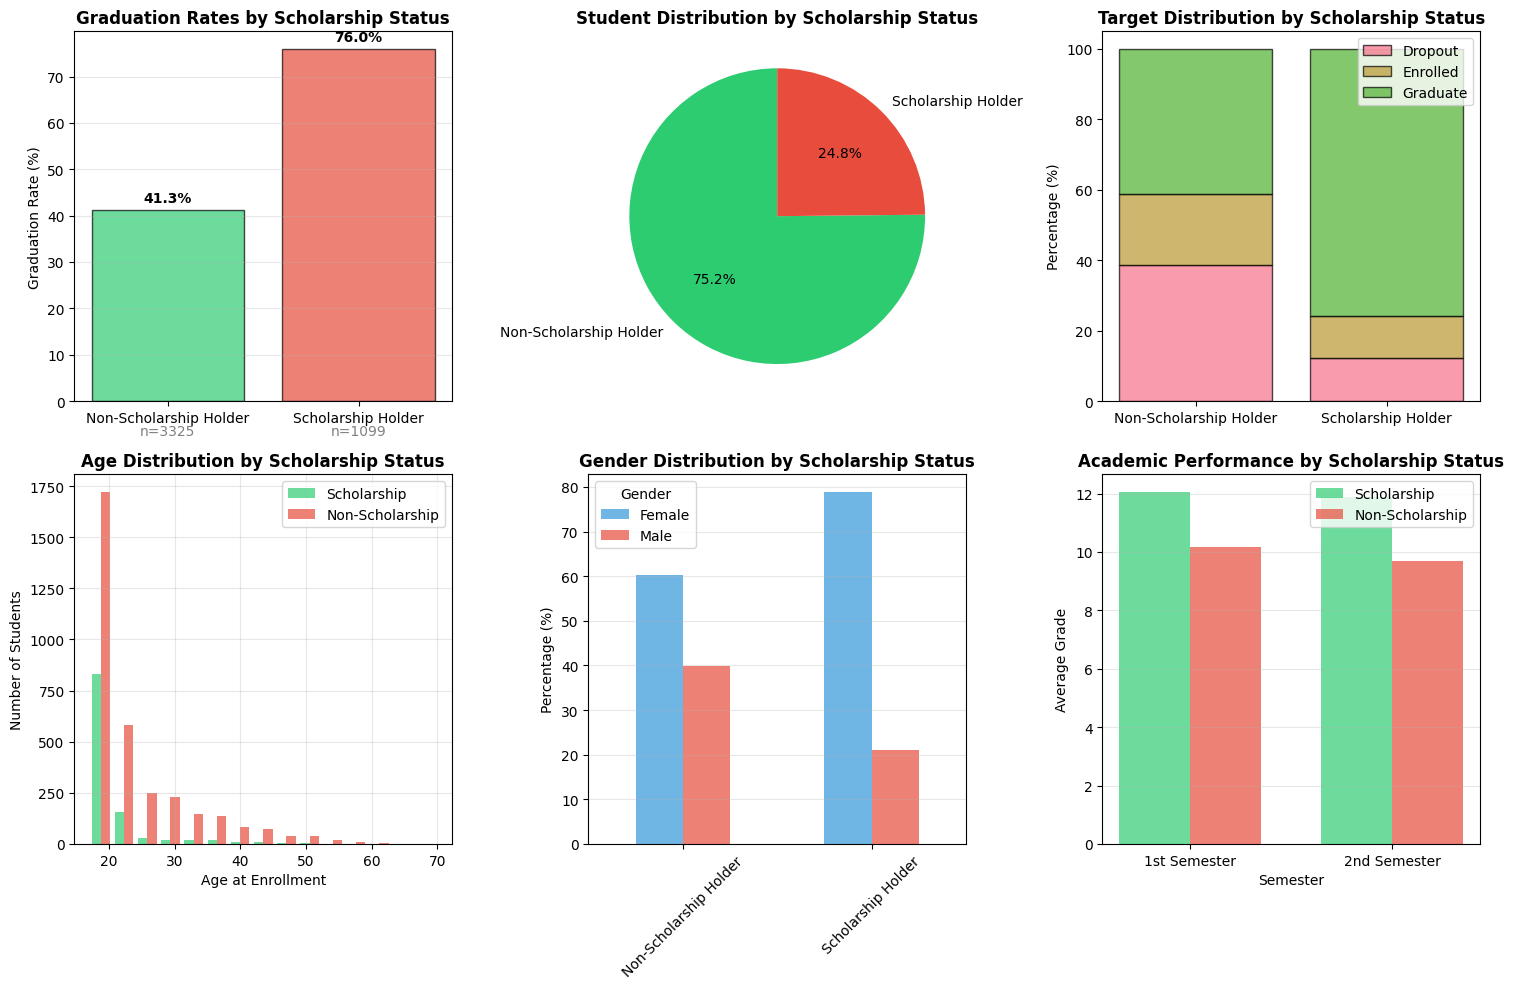


DETAILED STATISTICAL ANALYSIS
Graduation rate difference: +34.7%
Scholarship holders are +34.7% more likely to graduate
This suggests a meaningful difference in graduation rates based on scholarship status.

Demographic Comparison:
Average age - Scholarship holders: 20.8
Average age - Non-scholarship holders: 24.1

Gender distribution - Scholarship holders:
  Female: 78.9%
  Male: 21.1%
Gender distribution - Non-scholarship holders:
  Female: 60.2%
  Male: 39.8%

Debtors:
  Scholarship holders: 7.6%
  Non-scholarship holders: 12.6%

Fees Up to Date:
  Scholarship holders: 95.8%
  Non-scholarship holders: 85.5%

Academic Performance (Average Grades):
  1st Semester: Scholarship 12.1 vs Non-scholarship 10.2 (+1.9)
  2nd Semester: Scholarship 11.9 vs Non-scholarship 9.7 (+2.2)


In [12]:
# Chart 4: Graduation Rates by Scholarship Holder Status
print("="*60)
print("GRADUATION RATES BY SCHOLARSHIP HOLDER STATUS")
print("="*60)

# Map scholarship codes to meaningful names
scholarship_mapping = {
    1: 'Scholarship Holder',
    0: 'Non-Scholarship Holder'
}

# Calculate graduation rates by scholarship status
scholarship_graduation = df.groupby('Scholarship holder')['Target'].apply(
    lambda x: (x == 'Graduate').sum() / len(x) * 100
).reset_index()
scholarship_graduation.columns = ['Scholarship Code', 'Graduation Rate (%)']

# Add scholarship names and student counts
scholarship_graduation['Scholarship Status'] = scholarship_graduation['Scholarship Code'].map(scholarship_mapping)
scholarship_counts = df['Scholarship holder'].value_counts().reset_index()
scholarship_counts.columns = ['Scholarship Code', 'Student Count']
scholarship_graduation = scholarship_graduation.merge(scholarship_counts, on='Scholarship Code')

print("Table: Graduation Rates by Scholarship Status")
print("="*65)
print(f"{'Scholarship Status':<25} {'Student Count':<15} {'Graduation Rate (%)':<20}")
print("-" * 65)
for _, row in scholarship_graduation.iterrows():
    print(f"{row['Scholarship Status']:<25} {row['Student Count']:<15} {row['Graduation Rate (%)']:<20.1f}")

print("="*65)

# Create a comprehensive visualization
plt.figure(figsize=(15, 10))

# Plot 1: Graduation rate comparison
plt.subplot(2, 3, 1)
colors = ['#2ecc71', '#e74c3c']  # Green for scholarship, red for non-scholarship
bars = plt.bar(scholarship_graduation['Scholarship Status'], scholarship_graduation['Graduation Rate (%)'],
               color=colors, alpha=0.7, edgecolor='black')

plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rates by Scholarship Status', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Add student count below each bar
for i, (status, count) in enumerate(zip(scholarship_graduation['Scholarship Status'], scholarship_graduation['Student Count'])):
    plt.text(i, -5, f'n={count}', ha='center', va='top', fontsize=10, color='gray')

# Plot 2: Student distribution
plt.subplot(2, 3, 2)
plt.pie(scholarship_graduation['Student Count'], labels=scholarship_graduation['Scholarship Status'],
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Student Distribution by Scholarship Status', fontweight='bold')

# Plot 3: Target distribution within each scholarship status
plt.subplot(2, 3, 3)
scholarship_target = pd.crosstab(df['Scholarship holder'], df['Target'])
scholarship_target_percentage = scholarship_target.div(scholarship_target.sum(axis=1), axis=0) * 100

# Create stacked bar chart
scholarship_types = [scholarship_mapping[code] for code in scholarship_target.index]
bottom = np.zeros(len(scholarship_types))

for i, target in enumerate(['Dropout', 'Enrolled', 'Graduate']):
    plt.bar(scholarship_types, scholarship_target_percentage[target], bottom=bottom,
            label=target, alpha=0.7, edgecolor='black')
    bottom += scholarship_target_percentage[target]

plt.ylabel('Percentage (%)')
plt.title('Target Distribution by Scholarship Status', fontweight='bold')
plt.legend()

# Plot 4: Demographic comparison - Age distribution
plt.subplot(2, 3, 4)
scholarship_holders = df[df['Scholarship holder'] == 1]
non_scholarship = df[df['Scholarship holder'] == 0]

plt.hist([scholarship_holders['Age at enrollment'], non_scholarship['Age at enrollment']],
         bins=15, alpha=0.7, label=['Scholarship', 'Non-Scholarship'],
         color=['#2ecc71', '#e74c3c'])
plt.xlabel('Age at Enrollment')
plt.ylabel('Number of Students')
plt.title('Age Distribution by Scholarship Status', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 5: Demographic comparison - Gender distribution
plt.subplot(2, 3, 5)
gender_scholarship = pd.crosstab(df['Scholarship holder'], df['Gender'])
gender_scholarship_percentage = gender_scholarship.div(gender_scholarship.sum(axis=1), axis=0) * 100

# Map gender codes to names
gender_mapping = {1: 'Male', 0: 'Female'}
gender_scholarship_percentage.index = [scholarship_mapping[idx] for idx in gender_scholarship_percentage.index]
gender_scholarship_percentage.columns = [gender_mapping[col] for col in gender_scholarship_percentage.columns]

gender_scholarship_percentage.plot(kind='bar', ax=plt.gca(), color=['#3498db', '#e74c3c'], alpha=0.7)
plt.ylabel('Percentage (%)')
plt.title('Gender Distribution by Scholarship Status', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', alpha=0.3)

# Plot 6: Course performance comparison for scholarship vs non-scholarship
plt.subplot(2, 3, 6)
# Calculate average grades by scholarship status (if grade data is available)
grade_columns = ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

if all(col in df.columns for col in grade_columns):
    scholarship_grades = []
    non_scholarship_grades = []

    for col in grade_columns:
        scholarship_grades.append(scholarship_holders[col].mean())
        non_scholarship_grades.append(non_scholarship[col].mean())

    x = np.arange(len(grade_columns))
    width = 0.35

    plt.bar(x - width/2, scholarship_grades, width, label='Scholarship', alpha=0.7, color='#2ecc71')
    plt.bar(x + width/2, non_scholarship_grades, width, label='Non-Scholarship', alpha=0.7, color='#e74c3c')

    plt.xlabel('Semester')
    plt.ylabel('Average Grade')
    plt.title('Academic Performance by Scholarship Status', fontweight='bold')
    plt.xticks(x, ['1st Semester', '2nd Semester'])
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
else:
    # Alternative: Show tuition fees status if grade data not available
    if 'Tuition fees up to date' in df.columns:
        tuition_scholarship = pd.crosstab(df['Scholarship holder'], df['Tuition fees up to date'])
        tuition_scholarship_percentage = tuition_scholarship.div(tuition_scholarship.sum(axis=1), axis=0) * 100

        tuition_scholarship_percentage.plot(kind='bar', ax=plt.gca(), alpha=0.7)
        plt.ylabel('Percentage (%)')
        plt.title('Tuition Fees Status by Scholarship', fontweight='bold')
        plt.xticks(rotation=45)
        plt.legend(['Fees Not Up to Date', 'Fees Up to Date'])
        plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed statistical analysis
print("\n" + "="*60)
print("DETAILED STATISTICAL ANALYSIS")
print("="*60)

# Calculate difference in graduation rates
scholarship_rate = scholarship_graduation[scholarship_graduation['Scholarship Status'] == 'Scholarship Holder']['Graduation Rate (%)'].values[0]
non_scholarship_rate = scholarship_graduation[scholarship_graduation['Scholarship Status'] == 'Non-Scholarship Holder']['Graduation Rate (%)'].values[0]
difference = scholarship_rate - non_scholarship_rate

print(f"Graduation rate difference: {difference:+.1f}%")
print(f"Scholarship holders are {difference:+.1f}% more likely to graduate")

if abs(difference) > 5:
    print("This suggests a meaningful difference in graduation rates based on scholarship status.")
else:
    print("The difference in graduation rates based on scholarship status appears minimal.")

# Demographic comparisons
print(f"\nDemographic Comparison:")
print(f"Average age - Scholarship holders: {scholarship_holders['Age at enrollment'].mean():.1f}")
print(f"Average age - Non-scholarship holders: {non_scholarship['Age at enrollment'].mean():.1f}")

# Gender distribution
scholarship_gender = scholarship_holders['Gender'].value_counts(normalize=True) * 100
non_scholarship_gender = non_scholarship['Gender'].value_counts(normalize=True) * 100

print(f"\nGender distribution - Scholarship holders:")
for gender_code, percentage in scholarship_gender.items():
    gender_name = 'Male' if gender_code == 1 else 'Female'
    print(f"  {gender_name}: {percentage:.1f}%")

print(f"Gender distribution - Non-scholarship holders:")
for gender_code, percentage in non_scholarship_gender.items():
    gender_name = 'Male' if gender_code == 1 else 'Female'
    print(f"  {gender_name}: {percentage:.1f}%")

# Additional financial indicators
financial_indicators = ['Debtor', 'Tuition fees up to date']
for indicator in financial_indicators:
    if indicator in df.columns:
        scholarship_indicator = scholarship_holders[indicator].mean() * 100
        non_scholarship_indicator = non_scholarship[indicator].mean() * 100

        indicator_name = 'Debtors' if indicator == 'Debtor' else 'Fees Up to Date'
        print(f"\n{indicator_name}:")
        print(f"  Scholarship holders: {scholarship_indicator:.1f}%")
        print(f"  Non-scholarship holders: {non_scholarship_indicator:.1f}%")

# Academic performance comparison (if grade data available)
if all(col in df.columns for col in grade_columns):
    print(f"\nAcademic Performance (Average Grades):")
    for i, col in enumerate(grade_columns):
        semester = '1st' if i == 0 else '2nd'
        scholarship_grade = scholarship_holders[col].mean()
        non_scholarship_grade = non_scholarship[col].mean()
        grade_diff = scholarship_grade - non_scholarship_grade

        print(f"  {semester} Semester: Scholarship {scholarship_grade:.1f} vs Non-scholarship {non_scholarship_grade:.1f} ({grade_diff:+.1f})")



Os dados acima sugerem que bolsas de estudo tem um impacto forte positivo no índice de graduação dos alunos (76% x 41,3%) bem como impacto significativo na performance acadêmica. Mas é preciso ter cuidado  antes de indicar causaliade, pois é possível que os melhores alunos tenham mais probabilidade de receber bolsa, o que significa uma inversão da relação de causa/efeito

# Pré processamento dos dados

## Criando grupos etários

Primeiro passo para preprar os dados para o modelo será criar grupos etários para poder lidar melhor com a relação não linear da idade com a variável de interesse. o grupo entre 16 e 23 é o grupo de controle, portanto não é preciso criar uma variavel para ela

In [13]:
# Create the binary variables based on "age at enrollment"
df['Adult'] = ((df['Age at enrollment'] >= 23) & (df['Age at enrollment'] <= 30)).astype(int)
df['Mid'] = ((df['Age at enrollment'] >= 31) & (df['Age at enrollment'] <= 39)).astype(int)
df['Senior'] = (df['Age at enrollment'] >= 40).astype(int)

# Verify the results
print(df[['Age at enrollment', 'Adult', 'Mid', 'Senior']].head(10))

   Age at enrollment  Adult  Mid  Senior
0                 20      0    0       0
1                 19      0    0       0
2                 19      0    0       0
3                 20      0    0       0
4                 45      0    0       1
5                 50      0    0       1
6                 18      0    0       0
7                 22      0    0       0
8                 21      0    0       0
9                 18      0    0       0


In [14]:
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Graduated,Adult,Mid,Senior
0,1,17,5,171,1,1,122.0,1,19,12,...,0.000000,0,10.8,1.4,1.74,Dropout,0,0,0,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,13.666667,0,13.9,-0.3,0.79,Graduate,1,0,0,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0.000000,0,10.8,1.4,1.74,Dropout,0,0,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,12.400000,0,9.4,-0.8,-3.12,Graduate,1,0,0,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,13.000000,0,13.9,-0.3,0.79,Graduate,1,0,0,1


O próximo passo é realizar o one hot encoding para lidar com variáveis categórica como estado civil porexemplo. é necessário essa transformação para evitar que o modelo capture alguma relação linear náo existente. As variáveis escolhidas para serem transformadas são: 'Marital status',
    'Application mode',
    'Course',
    'Previous qualification',
    'Nacionality',
    'Mother\'s qualification',
    'Father\'s qualification',
    'Mother\'s occupation',
    'Father\'s occupation'

## One hot Encoding

In [15]:
# Create a copy of the original dataframe
encoded_df = df.copy()

# List of variables to one-hot encode
variables_to_encode = [
    'Marital status',
    'Application mode',
    'Course',
    'Previous qualification',
    'Nacionality',
    'Mother\'s qualification',
    'Father\'s qualification',
    'Mother\'s occupation',
    'Father\'s occupation'
]

# First, let's check which variables actually exist in the dataframe
print("Checking which variables exist in the dataframe:")
existing_variables = []
for var in variables_to_encode:
    if var in encoded_df.columns:
        existing_variables.append(var)
        print(f"✓ {var}")
    else:
        print(f"✗ {var} - Not found")

print(f"\nVariables to encode: {existing_variables}")

# One-hot encode each existing variable using pandas get_dummies
for var in existing_variables:
    # Create dummy variables, dropping the first category as reference
    dummies = pd.get_dummies(encoded_df[var], prefix=var, drop_first=True)

    # Add the dummy variables to the dataframe
    encoded_df = pd.concat([encoded_df, dummies], axis=1)

    print(f"Encoded {var} into {dummies.shape[1]} new variables")

# Display the results
print(f"\nOriginal dataframe shape: {df.shape}")
print(f"Encoded dataframe shape: {encoded_df.shape}")

# Show the new columns created
new_columns = [col for col in encoded_df.columns if col not in df.columns]
print(f"\nTotal new binary variables created: {len(new_columns)}")
print("New variables:", new_columns)

# Show a sample of the original and encoded data
print("\nSample of original and encoded data:")
sample_original = existing_variables[:2] if existing_variables else []
sample_encoded = new_columns[:3] if new_columns else []
sample_cols = sample_original + sample_encoded
if sample_cols:
    print(encoded_df[sample_cols].head())

Checking which variables exist in the dataframe:
✓ Marital status
✓ Application mode
✓ Course
✓ Previous qualification
✓ Nacionality
✓ Mother's qualification
✓ Father's qualification
✓ Mother's occupation
✓ Father's occupation

Variables to encode: ['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
Encoded Marital status into 5 new variables
Encoded Application mode into 17 new variables
Encoded Course into 16 new variables
Encoded Previous qualification into 16 new variables
Encoded Nacionality into 20 new variables
Encoded Mother's qualification into 28 new variables
Encoded Father's qualification into 33 new variables
Encoded Mother's occupation into 31 new variables
Encoded Father's occupation into 45 new variables

Original dataframe shape: (4424, 41)
Encoded dataframe shape: (4424, 252)

Total new binary variables created: 211
New variables: ['M

In [16]:
encoded_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Father's occupation_172,Father's occupation_174,Father's occupation_175,Father's occupation_181,Father's occupation_182,Father's occupation_183,Father's occupation_192,Father's occupation_193,Father's occupation_194,Father's occupation_195
0,1,17,5,171,1,1,122.0,1,19,12,...,False,False,False,False,False,False,False,False,False,False
1,1,15,1,9254,1,1,160.0,1,1,3,...,False,False,False,False,False,False,False,False,False,False
2,1,1,5,9070,1,1,122.0,1,37,37,...,False,False,False,False,False,False,False,False,False,False
3,1,17,2,9773,1,1,122.0,1,38,37,...,False,False,False,False,False,False,False,False,False,False
4,2,39,1,8014,0,1,100.0,1,37,38,...,False,False,False,False,False,False,False,False,False,False


## Dividindo entre treino e teste e normalizando/ padronizando as variáveis

O próximo passo é realizar a divisão dos dados entre treino e teste e então realizar transformações nas variáveis, normalização/ padronização dependendo do caso. Importante realizar essas transformações após separar em treino e teste utilizando as proporções da base de treino para evitar vazamento de dados

In [17]:
# Step 1: Split the data into 80% train and 20% test
if 'Target' in encoded_df.columns:
    train_df, test_df = train_test_split(encoded_df, test_size=0.2, random_state=42, stratify=encoded_df['Target'])
else:
    train_df, test_df = train_test_split(encoded_df, test_size=0.2, random_state=42)

print(f"Train set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

# Step 2: Define the variables for normalization and standardization
variables_to_normalize = [
    'Application order',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)'
]

variables_to_standardize = [
    'Previous qualification (grade)',
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Age at enrollment',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

# Step 3: Check which variables actually exist
available_norm_vars = [var for var in variables_to_normalize if var in train_df.columns]
available_std_vars = [var for var in variables_to_standardize if var in train_df.columns]

print(f"Available variables to normalize: {len(available_norm_vars)}")
print(f"Available variables to standardize: {len(available_std_vars)}")

# Step 4: Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Step 5: Normalize variables - create new columns with normalized values
if available_norm_vars:
    # Fit the scaler on training data
    minmax_scaler.fit(train_df[available_norm_vars])

    # Transform both train and test data
    train_normalized = minmax_scaler.transform(train_df[available_norm_vars])
    test_normalized = minmax_scaler.transform(test_df[available_norm_vars])

    # Create new DataFrames with normalized values
    train_normalized_df = pd.DataFrame(train_normalized,
                                     columns=[f"{col}_normalized" for col in available_norm_vars],
                                     index=train_df.index)
    test_normalized_df = pd.DataFrame(test_normalized,
                                    columns=[f"{col}_normalized" for col in available_norm_vars],
                                    index=test_df.index)

    # Add normalized columns to the dataframes
    train_df = pd.concat([train_df, train_normalized_df], axis=1)
    test_df = pd.concat([test_df, test_normalized_df], axis=1)

    # DROP THE ORIGINAL VARIABLES AFTER CREATING NORMALIZED VERSIONS
    train_df = train_df.drop(columns=available_norm_vars)
    test_df = test_df.drop(columns=available_norm_vars)

    print("✓ Normalization completed and original variables dropped")

# Step 6: Standardize variables - create new columns with standardized values
if available_std_vars:
    # Fit the scaler on training data
    standard_scaler.fit(train_df[available_std_vars])

    # Transform both train and test data
    train_standardized = standard_scaler.transform(train_df[available_std_vars])
    test_standardized = standard_scaler.transform(test_df[available_std_vars])

    # Create new DataFrames with standardized values
    train_standardized_df = pd.DataFrame(train_standardized,
                                       columns=[f"{col}_standardized" for col in available_std_vars],
                                       index=train_df.index)
    test_standardized_df = pd.DataFrame(test_standardized,
                                      columns=[f"{col}_standardized" for col in available_std_vars],
                                      index=test_df.index)

    # Add standardized columns to the dataframes
    train_df = pd.concat([train_df, train_standardized_df], axis=1)
    test_df = pd.concat([test_df, test_standardized_df], axis=1)

    # DROP THE ORIGINAL VARIABLES AFTER CREATING STANDARDIZED VERSIONS
    train_df = train_df.drop(columns=available_std_vars)
    test_df = test_df.drop(columns=available_std_vars)

    print("✓ Standardization completed and original variables dropped")

# Step 7: Verify the results
print(f"\nFinal train set shape: {train_df.shape}")
print(f"Final test set shape: {test_df.shape}")

# Show the new normalized/standardized columns
new_norm_cols = [col for col in train_df.columns if 'normalized' in col]
new_std_cols = [col for col in train_df.columns if 'standardized' in col]

print(f"\nNew normalized columns ({len(new_norm_cols)}): {new_norm_cols}")
print(f"New standardized columns ({len(new_std_cols)}): {new_std_cols}")

# Display summary statistics to verify the scaling worked correctly
print("\nSummary statistics for standardized variables in train set:")
if new_std_cols:
    print(train_df[new_std_cols].describe().loc[['mean', 'std']].round(3))

print("\nSummary statistics for normalized variables in train set:")
if new_norm_cols:
    print(train_df[new_norm_cols].describe().loc[['min', 'max']].round(3))

# Verify that original variables have been removed
remaining_original_norm = [var for var in variables_to_normalize if var in train_df.columns]
remaining_original_std = [var for var in variables_to_standardize if var in train_df.columns]

print(f"\nRemaining original normalization variables: {remaining_original_norm}")
print(f"Remaining original standardization variables: {remaining_original_std}")

Train set shape: (3539, 252)
Test set shape: (885, 252)
Available variables to normalize: 11
Available variables to standardize: 8
✓ Normalization completed and original variables dropped
✓ Standardization completed and original variables dropped

Final train set shape: (3539, 252)
Final test set shape: (885, 252)

New normalized columns (11): ['Application order_normalized', 'Curricular units 1st sem (credited)_normalized', 'Curricular units 1st sem (enrolled)_normalized', 'Curricular units 1st sem (evaluations)_normalized', 'Curricular units 1st sem (approved)_normalized', 'Curricular units 1st sem (without evaluations)_normalized', 'Curricular units 2nd sem (credited)_normalized', 'Curricular units 2nd sem (enrolled)_normalized', 'Curricular units 2nd sem (evaluations)_normalized', 'Curricular units 2nd sem (approved)_normalized', 'Curricular units 2nd sem (without evaluations)_normalized']
New standardized columns (8): ['Previous qualification (grade)_standardized', 'Admission grad

## Últimos ajustes

Aqui irei remover as variáveis que foram originalmente encoded da base de dados para evitar vazamento de dados, além disso, no processo de encode foi criado uma variável por engano chamada graduated que estava gerando vazamento de dados o resultado finals são os datasets que serão utilizados para treinar/ testar nosso modelo

In [18]:
# List of original columns to drop (both categorical and numerical)
columns_to_drop = [
    # Original categorical variables that were one-hot encoded
    'Marital status',
    'Application mode',
    'Course',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",

    # The suspicious variable that's likely causing data leakage
    'Graduated',

    # Original numerical variables that were normalized/standardized
    'Application order',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)',
    'Previous qualification (grade)',
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Age at enrollment',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

# Only drop columns that actually exist in the dataframes
columns_to_drop_exist_train = [col for col in columns_to_drop if col in train_df.columns]
columns_to_drop_exist_test = [col for col in columns_to_drop if col in test_df.columns]

print(f"Dropping {len(columns_to_drop_exist_train)} columns from train_df")
print(f"Dropping {len(columns_to_drop_exist_test)} columns from test_df")

# Drop the columns
train_df_clean = train_df.drop(columns=columns_to_drop_exist_train)
test_df_clean = test_df.drop(columns=columns_to_drop_exist_test)

print(f"\nTrain shape after dropping original columns: {train_df_clean.shape}")
print(f"Test shape after dropping original columns: {test_df_clean.shape}")

# Verify that 'Graduated' and other original variables are gone
print(f"\n'Graduated' in train_df_clean: {'Graduated' in train_df_clean.columns}")
print(f"'Marital status' in train_df_clean: {'Marital status' in train_df_clean.columns}")

# Let's also check if our target variable is still there
print(f"'Target' in train_df_clean: {'Target' in train_df_clean.columns}")
print("\n✅ Data cleaning completed! Original variables and 'Graduated' column have been removed.")


Dropping 10 columns from train_df
Dropping 10 columns from test_df

Train shape after dropping original columns: (3539, 242)
Test shape after dropping original columns: (885, 242)

'Graduated' in train_df_clean: False
'Marital status' in train_df_clean: False
'Target' in train_df_clean: True

✅ Data cleaning completed! Original variables and 'Graduated' column have been removed.


In [19]:
train_df_clean.head()

,Daytime/evening attendance\t,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target,Adult,...,Curricular units 2nd sem (approved)_normalized,Curricular units 2nd sem (without evaluations)_normalized,Previous qualification (grade)_standardized,Admission grade_standardized,Curricular units 1st sem (grade)_standardized,Curricular units 2nd sem (grade)_standardized,Age at enrollment_standardized,Unemployment rate_standardized,Inflation rate_standardized,GDP_standardized
2283,1,0,0,0,1,1,0,0,Graduate,0,...,0.50,0.000000,-0.960935,-0.569684,0.364851,0.304781,-0.295828,0.872138,-1.103473,0.339595
3874,1,1,0,1,0,1,0,0,Dropout,0,...,0.00,0.416667,0.031460,-0.473323,-2.181071,-1.949336,2.334335,0.421006,1.795972,-0.756629
2281,1,0,0,0,1,1,0,0,Enrolled,0,...,0.20,0.000000,0.554172,0.903267,0.231395,0.056446,-0.295828,1.473648,1.143597,-1.795621
817,1,1,0,0,1,0,0,0,Graduate,0,...,0.30,0.000000,-0.582158,-0.418259,0.796015,0.502175,-0.690353,0.308223,-0.523584,0.779846
404,1,1,0,0,1,0,0,0,Graduate,0,...,0.35,0.000000,0.705683,0.304450,0.843531,0.864762,-0.558845,-0.293287,0.128791,0.757833


In [20]:
test_df_clean.head()

,Daytime/evening attendance\t,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target,Adult,...,Curricular units 2nd sem (approved)_normalized,Curricular units 2nd sem (without evaluations)_normalized,Previous qualification (grade)_standardized,Admission grade_standardized,Curricular units 1st sem (grade)_standardized,Curricular units 2nd sem (grade)_standardized,Age at enrollment_standardized,Unemployment rate_standardized,Inflation rate_standardized,GDP_standardized
1853,1,1,0,0,1,1,0,0,Graduate,0,...,0.30,0.0,2.069280,2.279857,0.693357,0.852391,-0.427337,0.308223,-0.523584,0.779846
2399,1,0,0,0,1,1,0,0,Graduate,0,...,0.40,0.0,-0.127626,-0.039697,0.383916,0.288066,-0.558845,1.736808,-0.668556,-0.413234
510,1,1,0,0,1,0,0,0,Enrolled,0,...,0.00,0.0,-0.885180,-0.425142,0.026079,-1.949336,-0.690353,-0.819608,-1.465903,-1.381785
242,1,1,0,0,1,0,1,0,Graduate,0,...,0.25,0.0,-1.112446,-0.535269,0.200598,0.648629,-0.427337,0.308223,-0.523584,0.779846
3392,1,0,0,0,1,0,1,0,Graduate,0,...,0.30,0.0,0.031460,1.935710,0.488041,0.470337,-0.295828,1.736808,-0.668556,-0.413234


# Treinamento dos modelos

## Regressão logística

Primeiro, irei começar o exercício com uma regressão logística, sem penalização para ver como esse modelo mais simples se sai comparado com os outros

BASELINE MODEL: STANDARD LOGISTIC REGRESSION (NO REGULARIZATION)
Training set shape: (3539, 241)
Test set shape: (885, 241)
Target classes: ['Dropout' 'Enrolled' 'Graduate']

TRAINING STANDARD LOGISTIC REGRESSION


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Standard Logistic Regression training completed!

MODEL PERFORMANCE EVALUATION

Standard Logistic Regression - Train Set Performance:
Accuracy: 0.8155
Precision: 0.8082
Recall: 0.8155
F1-Score: 0.8070

Detailed Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.81      0.83      1137
    Enrolled       0.68      0.49      0.57       635
    Graduate       0.83      0.94      0.88      1767

    accuracy                           0.82      3539
   macro avg       0.79      0.74      0.76      3539
weighted avg       0.81      0.82      0.81      3539


Standard Logistic Regression - Test Set Performance:
Accuracy: 0.7503
Precision: 0.7332
Recall: 0.7503
F1-Score: 0.7383

Detailed Classification Report:
              precision    recall  f1-score   support

     Dropout       0.77      0.76      0.76       284
    Enrolled       0.48      0.34      0.40       159
    Graduate       0.80      0.89      0.84       442

    accurac

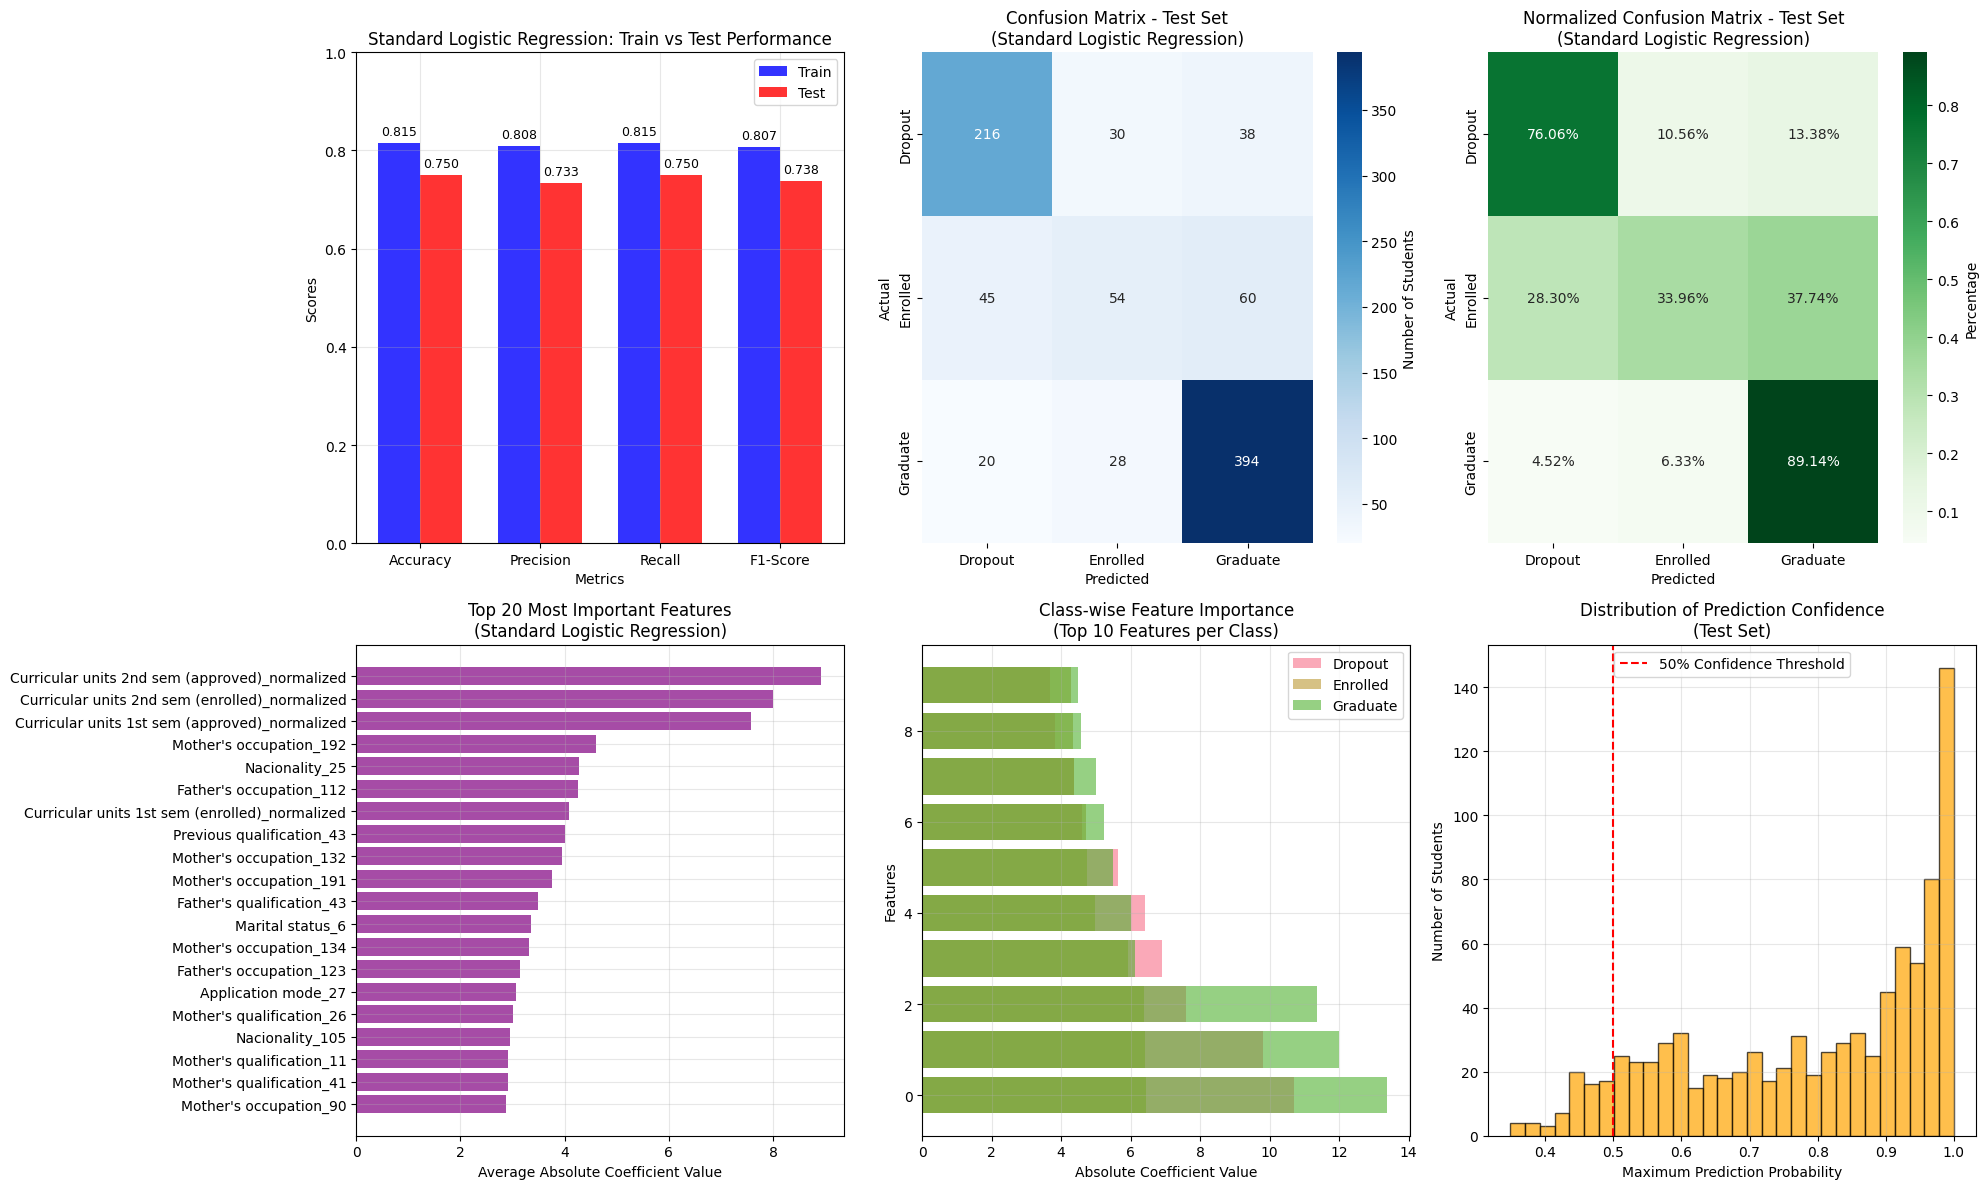


DETAILED COEFFICIENT ANALYSIS

📊 Coefficients for Class: Dropout
--------------------------------------------------
Top 10 features for Dropout:
                                            Feature  Coefficient  \
231  Curricular units 2nd sem (approved)_normalized     -10.7097   
229  Curricular units 2nd sem (enrolled)_normalized       9.8031   
226  Curricular units 1st sem (approved)_normalized      -7.5853   
174                         Mother's occupation_192      -6.8913   
74                                   Nacionality_25      -6.4058   
173                         Mother's occupation_191      -5.6426   
25                              Application mode_27       4.6010   
92                        Mother's qualification_11       4.3727   
133                       Father's qualification_31       3.8341   
210                         Father's occupation_163      -3.6741   

     Absolute_Value  
231         10.7097  
229          9.8031  
226          7.5853  
174          6.89

In [21]:
print("="*60)
print("BASELINE MODEL: STANDARD LOGISTIC REGRESSION (NO REGULARIZATION)")
print("="*60)

# Prepare the data
X_train = train_df_clean.drop(columns=['Target'])
X_test = test_df_clean.drop(columns=['Target'])

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(train_df_clean['Target'])
y_test_encoded = le.transform(test_df_clean['Target'])

class_names = le.classes_

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target classes: {class_names}")

# Step 1: Train Standard Logistic Regression (No Regularization)
print("\n" + "="*50)
print("TRAINING STANDARD LOGISTIC REGRESSION")
print("="*50)

standard_lr_model = LogisticRegression(
    penalty=None,  # No regularization (Corrected from 'none')
    solver='lbfgs',  # Appropriate solver for no penalty
    random_state=42,
    max_iter=2000,   # Increased for convergence
    multi_class='multinomial'  # For multi-class classification
)

standard_lr_model.fit(X_train, y_train_encoded)

# Make predictions
y_train_pred = standard_lr_model.predict(X_train)
y_test_pred = standard_lr_model.predict(X_test)

# Get predicted probabilities
y_train_proba = standard_lr_model.predict_proba(X_train)
y_test_proba = standard_lr_model.predict_proba(X_test)

print("✅ Standard Logistic Regression training completed!")

# Step 2: Evaluate Model Performance
print("\n" + "="*50)
print("MODEL PERFORMANCE EVALUATION")
print("="*50)

def evaluate_model_detailed(y_true, y_pred, y_proba, model_name, dataset_name):
    """Comprehensive model evaluation"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} - {dataset_name} Set Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Detailed classification report
    print(f"\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    return accuracy, precision, recall, f1

# Evaluate on both sets
train_acc, train_prec, train_rec, train_f1 = evaluate_model_detailed(
    y_train_encoded, y_train_pred, y_train_proba, "Standard Logistic Regression", "Train"
)

test_acc, test_prec, test_rec, test_f1 = evaluate_model_detailed(
    y_test_encoded, y_test_pred, y_test_proba, "Standard Logistic Regression", "Test"
)

# Step 3: Create Performance Visualization
print("\n" + "="*50)
print("PERFORMANCE VISUALIZATION")
print("="*50)

# Create comprehensive visualization
plt.figure(figsize=(20, 12))

# Plot 1: Performance metrics comparison (Train vs Test)
plt.subplot(2, 3, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [train_acc, train_prec, train_rec, train_f1]
test_scores = [test_acc, test_prec, test_rec, test_f1]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Train', alpha=0.8, color='blue')
plt.bar(x + width/2, test_scores, width, label='Test', alpha=0.8, color='red')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Standard Logistic Regression: Train vs Test Performance')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.0)

# Add value labels on bars
for i, (train_val, test_val) in enumerate(zip(train_scores, test_scores)):
    plt.text(i - width/2, train_val + 0.01, f'{train_val:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, test_val + 0.01, f'{test_val:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Confusion Matrix (Test Set)
plt.subplot(2, 3, 2)
cm = confusion_matrix(y_test_encoded, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Number of Students'})
plt.title('Confusion Matrix - Test Set\n(Standard Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot 3: Normalized Confusion Matrix
plt.subplot(2, 3, 3)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage'})
plt.title('Normalized Confusion Matrix - Test Set\n(Standard Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot 4: Feature Importance (Coefficient Magnitudes)
plt.subplot(2, 3, 4)
if hasattr(standard_lr_model, 'coef_'):
    # For multi-class, take mean absolute coefficient across classes
    feature_importance = np.mean(np.abs(standard_lr_model.coef_), axis=0)
    importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': feature_importance
    }).sort_values('importance', ascending=False).head(20)

    plt.barh(range(len(importance_df)), importance_df['importance'], color='purple', alpha=0.7)
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Average Absolute Coefficient Value')
    plt.title('Top 20 Most Important Features\n(Standard Logistic Regression)')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)

# Plot 5: Class-wise Coefficient Analysis
plt.subplot(2, 3, 5)
if hasattr(standard_lr_model, 'coef_'):
    # Show top 10 features for each class
    n_top_features = 10
    for i, class_name in enumerate(class_names):
        class_coef = np.abs(standard_lr_model.coef_[i])
        top_indices = np.argsort(class_coef)[-n_top_features:][::-1]
        top_features = X_train.columns[top_indices]
        top_values = class_coef[top_indices]

        plt.barh(range(len(top_features)), top_values, alpha=0.6, label=class_name)

    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Features')
    plt.title('Class-wise Feature Importance\n(Top 10 Features per Class)')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Plot 6: Prediction Probability Distribution
plt.subplot(2, 3, 6)
# Plot histogram of maximum prediction probabilities
max_probs = np.max(y_test_proba, axis=1)
plt.hist(max_probs, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Maximum Prediction Probability')
plt.ylabel('Number of Students')
plt.title('Distribution of Prediction Confidence\n(Test Set)')
plt.axvline(x=0.5, color='red', linestyle='--', label='50% Confidence Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 4: Detailed Coefficient Analysis
print("\n" + "="*50)
print("DETAILED COEFFICIENT ANALYSIS")
print("="*50)

if hasattr(standard_lr_model, 'coef_'):
    # Create coefficient tables for each class
    for i, class_name in enumerate(class_names):
        print(f"\n📊 Coefficients for Class: {class_name}")
        print("-" * 50)

        # Get coefficients for this class
        coefficients = standard_lr_model.coef_[i]

        # Create DataFrame for better display
        coef_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': coefficients,
            'Absolute_Value': np.abs(coefficients)
        }).sort_values('Absolute_Value', ascending=False)

        print(f"Top 10 features for {class_name}:")
        print(coef_df.head(10).round(4))

        # Statistical summary
        print(f"\nCoefficient Statistics for {class_name}:")
        print(f"Mean Absolute Coefficient: {np.mean(np.abs(coefficients)):.4f}")
        print(f"Max Coefficient: {np.max(coefficients):.4f}")
        print(f"Min Coefficient: {np.min(coefficients):.4f}")
        print(f"Number of Positive Coefficients: {np.sum(coefficients > 0)}")
        print(f"Number of Negative Coefficients: {np.sum(coefficients < 0)}")

# Step 5: Model Interpretation Insights
print("\n" + "="*50)
print("MODEL INTERPRETATION INSIGHTS")
print("="*50)

# Calculate overfitting metric
overfitting_gap = train_acc - test_acc
print(f"Overfitting Analysis:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Accuracy Gap (Train - Test): {overfitting_gap:.4f}")

if overfitting_gap > 0.05:
    print("⚠️  Significant overfitting detected (gap > 0.05)")
elif overfitting_gap > 0.02:
    print("ℹ️  Moderate overfitting detected (gap > 0.02)")
else:
    print("✅ Good generalization (minimal overfitting)")

# Class-wise performance analysis
print(f"\nClass-wise Performance Analysis:")
class_report = classification_report(y_test_encoded, y_test_pred, target_names=class_names, output_dict=True)
for class_name in class_names:
    precision = class_report[class_name]['precision']
    recall = class_report[class_name]['recall']
    f1 = class_report[class_name]['f1-score']
    support = class_report[class_name]['support']

    print(f"{class_name}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Support={support}")

# Step 6: Save Results
print("\n" + "="*50)
print("SAVING RESULTS")
print("="*50)

# Save feature importance
if hasattr(standard_lr_model, 'coef_'):
    feature_importance = np.mean(np.abs(standard_lr_model.coef_), axis=0)
    importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)

    importance_df.to_csv('standard_lr_feature_importance.csv', index=False)
    print("✅ Feature importance saved to 'standard_lr_feature_importance.csv'")

# Save performance metrics
performance_metrics = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_acc, test_acc],
    'Precision': [train_prec, test_prec],
    'Recall': [train_rec, test_rec],
    'F1_Score': [train_f1, test_f1]
})

performance_metrics.to_csv('standard_lr_performance_metrics.csv', index=False)
print("✅ Performance metrics saved to 'standard_lr_performance_metrics.csv'")

print("\n" + "="*60)
print("STANDARD LOGISTIC REGRESSION ANALYSIS COMPLETED!")
print("="*60)
print("📊 This baseline model provides a foundation for comparing with regularized models.")
print("🔍 The coefficients can be directly interpreted as log-odds ratios.")
print("💡 Next steps: Compare with Ridge/Lasso to see regularization effects.")

O modelo de regressão linear logistca mostra que aprovação em disciplinas no segundo semestre é o fator mais relevante para determinar a graduação do aluno no tempo previsto, ao mesmo tempo o número de disciplinas matriculadas tem um coeficiente negativo, o que significa que pegar muitas disciplinas mas não ser aprovado pode ser um sinal de alerta. Esse é um insight importante que deve ser compartilhado com o time de implantação da política de ajuda acadêmica.

Quanto a performance do modelo, podemos ver que o modelo consegue detectar com precisão relativamente alta os alunos pertecentes as classes graduate e dropout, tendo problemas em detectar a classe intermediária (Enrolled) com precisão de  48% e com recall de 34%. O que está longe do ideal. Pra essa classe o modelo teve 60 alunos flagados como graduate que perderiam a oportunidade de receber ajuda caso esse fosse o modelo implementado e 45 alunos marcados como dropout o que é menos grave, mas ainda assim um problema (talvez fossem direcionadas para uma ajuda diferente da ideal)

Um último detalhe é que o modelo apresentou uma precisão consideravelmente maior na base de treino comparado com a base de teste para todas as classes, o que significa que tivemos problema considerável de overfitting ( o modelo se enviesou pelos dados da amostra)

## Mínimos quadrados penalizados (Ridge e Lasso)

A seguir apresento os modelos de mínimos quadrados penalizados: Ridge (o peso de nenhuma variável é zerado) e Lasso (variáveis podem ter seu peso reduzido a zero no modelo)

Training set shape: (3539, 241)
Test set shape: (885, 241)
Target classes: ['Dropout' 'Enrolled' 'Graduate']

TRAINING RIDGE CLASSIFIER

TRAINING LASSO CLASSIFIER

Ridge - Train Set Performance:
Accuracy: 0.7923
F1-Score: 0.7686
Recall: 0.7923

Detailed Classification Report:
              precision    recall  f1-score   support

     Dropout       0.86      0.79      0.82      1137
    Enrolled       0.72      0.30      0.42       635
    Graduate       0.77      0.98      0.86      1767

    accuracy                           0.79      3539
   macro avg       0.78      0.69      0.70      3539
weighted avg       0.79      0.79      0.77      3539


Ridge - Test Set Performance:
Accuracy: 0.7503
F1-Score: 0.7208
Recall: 0.7503

Detailed Classification Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.76      0.79       284
    Enrolled       0.45      0.19      0.27       159
    Graduate       0.75      0.95      0.84       442

    accurac

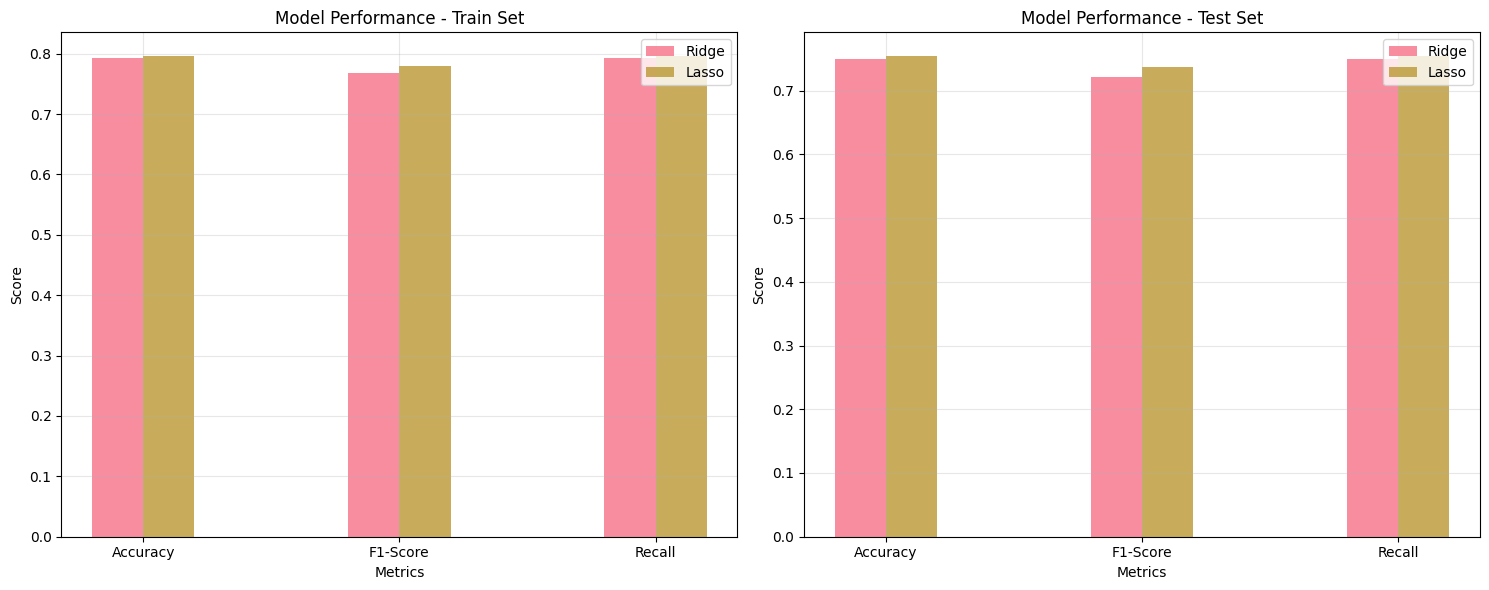

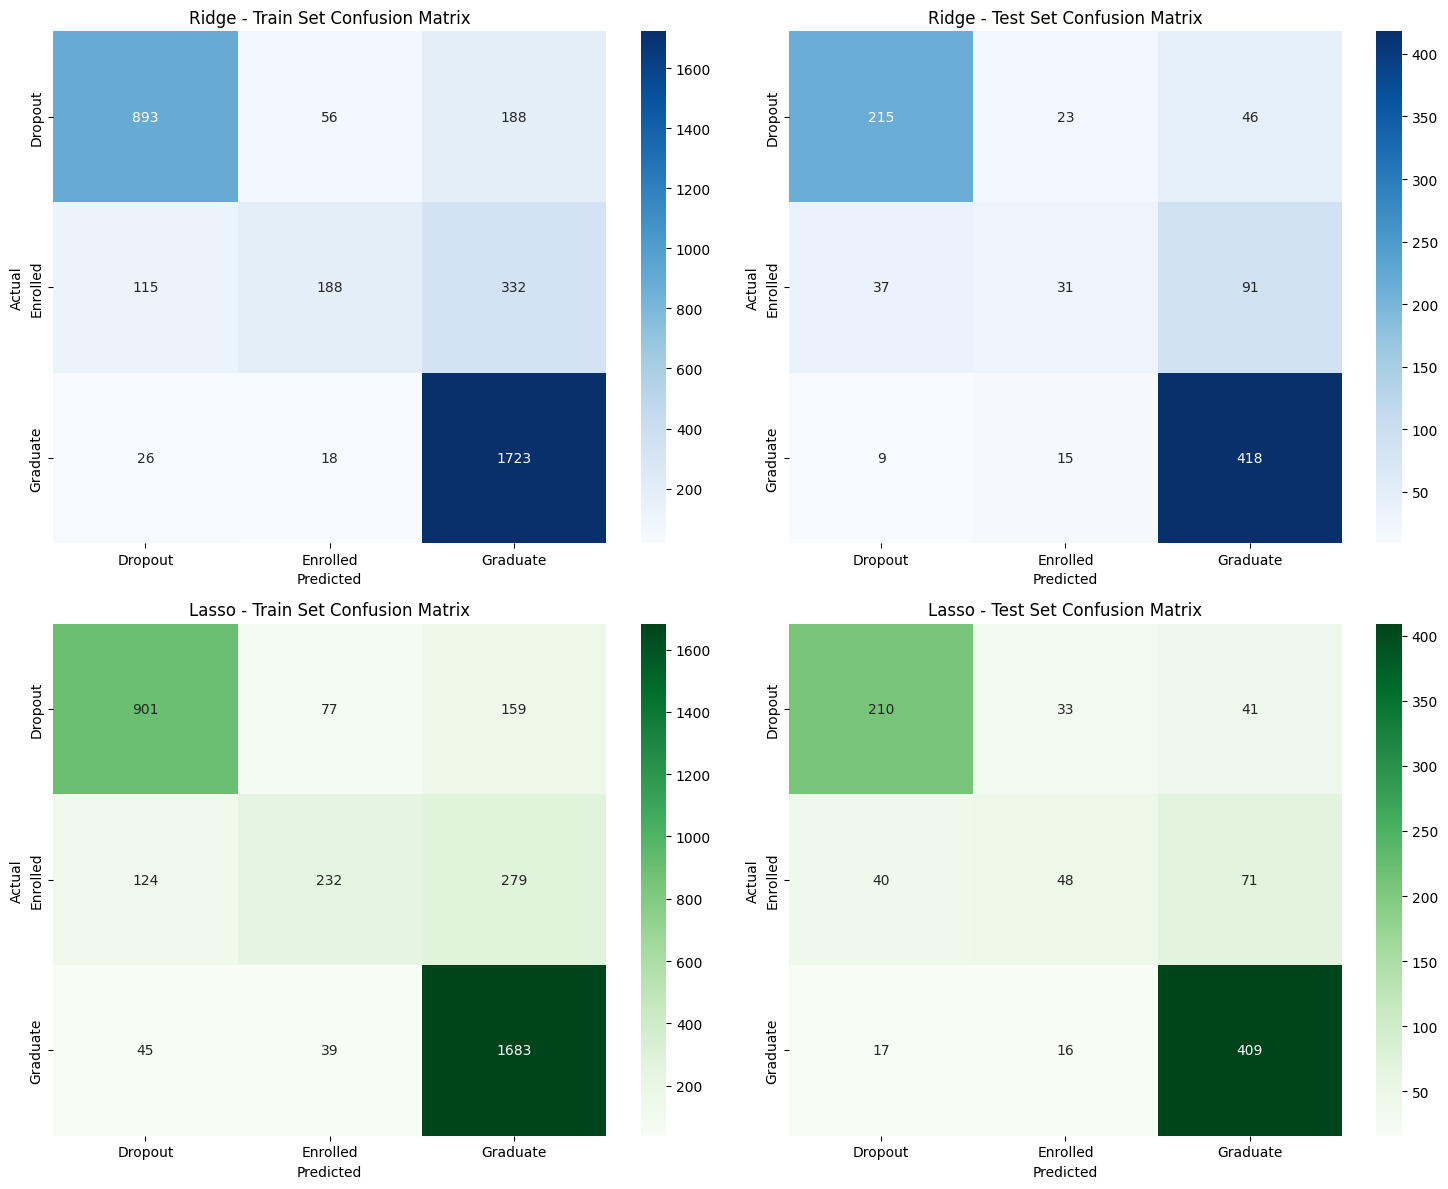


TOP 100 RELEVANT VARIABLES

Top 20 Variables for Ridge Model:
                                               feature  importance
231     Curricular units 2nd sem (approved)_normalized    2.888149
226     Curricular units 1st sem (approved)_normalized    1.626420
229     Curricular units 2nd sem (enrolled)_normalized    1.513170
230  Curricular units 2nd sem (evaluations)_normalized    0.784941
228     Curricular units 2nd sem (credited)_normalized    0.738824
..                                                 ...         ...
222                       Application order_normalized    0.185392
211                            Father's occupation_171    0.183962
191                            Father's occupation_103    0.182549
172                            Mother's occupation_175    0.174774
107                          Mother's qualification_39    0.173841

[100 rows x 2 columns]


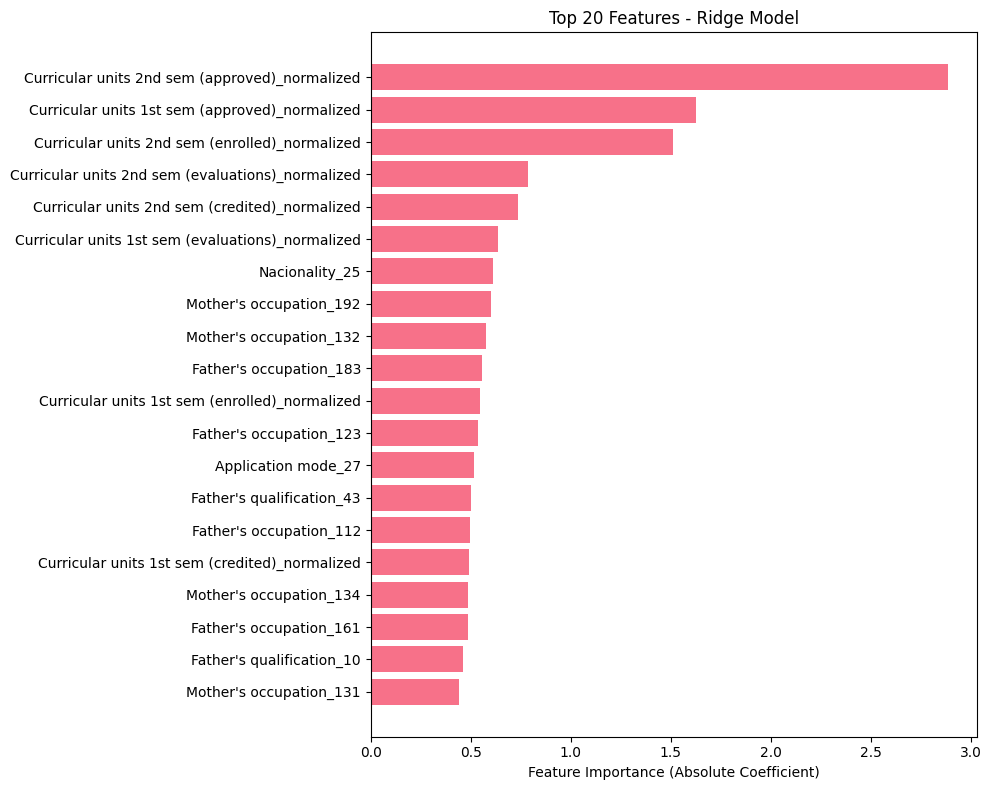


Top 20 Variables for Lasso Model:
                                               feature  importance
231     Curricular units 2nd sem (approved)_normalized   10.334870
229     Curricular units 2nd sem (enrolled)_normalized    8.589155
226     Curricular units 1st sem (approved)_normalized    5.810711
230  Curricular units 2nd sem (evaluations)_normalized    2.361236
225  Curricular units 1st sem (evaluations)_normalized    2.112399
..                                                 ...         ...
36                                         Course_9070    0.073915
121                          Father's qualification_12    0.072836
11                                    Marital status_2    0.072771
21                                 Application mode_16    0.067187
181                              Father's occupation_5    0.063811

[100 rows x 2 columns]


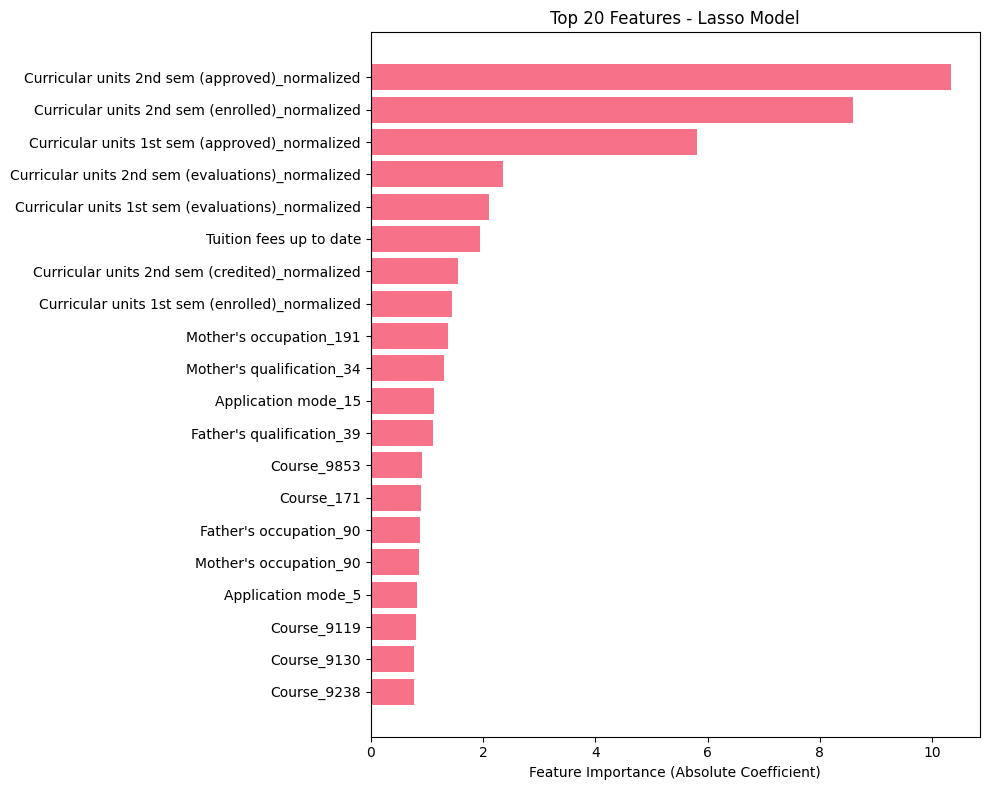


Lasso Model Sparsity:
Zero coefficients: 449/723 (62.10%)

Top 100 features for each model have been saved to CSV files.

Performance Summary:
   Model Dataset  Accuracy  F1-Score    Recall
0  Ridge   Train  0.792314  0.768584  0.792314
1  Ridge    Test  0.750282  0.720830  0.750282
2  Lasso   Train  0.795705  0.779274  0.795705
3  Lasso    Test  0.753672  0.736217  0.753672


In [22]:
# Step 1: Prepare the data for modeling
# Separate features and target variable
X_train = train_df_clean.drop(columns=['Target'])
X_test = test_df_clean.drop(columns=['Target'])

# Encode the target variable if it's categorical
le = LabelEncoder()
y_train_encoded = le.fit_transform(train_df['Target'])
y_test_encoded = le.transform(test_df['Target'])

# Get the class names for reporting
class_names = le.classes_

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target classes: {class_names}")

# Step 2: Create and train Ridge Classifier
print("\n" + "="*50)
print("TRAINING RIDGE CLASSIFIER")
print("="*50)

# Ridge Classifier (L2 regularization)
ridge_model = RidgeClassifier(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train_encoded)

# Make predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Step 3: Create and train Lasso Classifier (Logistic Regression with L1 penalty)
print("\n" + "="*50)
print("TRAINING LASSO CLASSIFIER")
print("="*50)

# Lasso Classifier (Logistic Regression with L1 regularization)
lasso_model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42, max_iter=1000)
lasso_model.fit(X_train, y_train_encoded)

# Make predictions
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Step 4: Evaluate model performance
def evaluate_model(y_true, y_pred, model_name, dataset_name):
    """Evaluate model performance and return metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} - {dataset_name} Set Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")

    # Detailed classification report
    print(f"\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    return accuracy, f1, recall

# Evaluate both models on train and test sets
ridge_train_acc, ridge_train_f1, ridge_train_recall = evaluate_model(y_train_encoded, y_train_pred_ridge, "Ridge", "Train")
ridge_test_acc, ridge_test_f1, ridge_test_recall = evaluate_model(y_test_encoded, y_test_pred_ridge, "Ridge", "Test")

lasso_train_acc, lasso_train_f1, lasso_train_recall = evaluate_model(y_train_encoded, y_train_pred_lasso, "Lasso", "Train")
lasso_test_acc, lasso_test_f1, lasso_test_recall = evaluate_model(y_test_encoded, y_test_pred_lasso, "Lasso", "Test")

# Step 5: Create comparison charts
print("\n" + "="*50)
print("PERFORMANCE COMPARISON CHARTS")
print("="*50)

# Prepare data for visualization
metrics = ['Accuracy', 'F1-Score', 'Recall']
train_ridge = [ridge_train_acc, ridge_train_f1, ridge_train_recall]
test_ridge = [ridge_test_acc, ridge_test_f1, ridge_test_recall]
train_lasso = [lasso_train_acc, lasso_train_f1, lasso_train_recall]
test_lasso = [lasso_test_acc, lasso_test_f1, lasso_test_recall]

x = np.arange(len(metrics))
width = 0.2

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Train set comparison
ax1.bar(x - width/2, train_ridge, width, label='Ridge', alpha=0.8)
ax1.bar(x + width/2, train_lasso, width, label='Lasso', alpha=0.8)
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Score')
ax1.set_title('Model Performance - Train Set')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Test set comparison
ax2.bar(x - width/2, test_ridge, width, label='Ridge', alpha=0.8)
ax2.bar(x + width/2, test_lasso, width, label='Lasso', alpha=0.8)
ax2.set_xlabel('Metrics')
ax2.set_ylabel('Score')
ax2.set_title('Model Performance - Test Set')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 6: Confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Ridge confusion matrices
cm_ridge_train = confusion_matrix(y_train_encoded, y_train_pred_ridge)
cm_ridge_test = confusion_matrix(y_test_encoded, y_test_pred_ridge)

sns.heatmap(cm_ridge_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0,0])
axes[0,0].set_title('Ridge - Train Set Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

sns.heatmap(cm_ridge_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0,1])
axes[0,1].set_title('Ridge - Test Set Confusion Matrix')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# Lasso confusion matrices
cm_lasso_train = confusion_matrix(y_train_encoded, y_train_pred_lasso)
cm_lasso_test = confusion_matrix(y_test_encoded, y_test_pred_lasso)

sns.heatmap(cm_lasso_train, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, ax=axes[1,0])
axes[1,0].set_title('Lasso - Train Set Confusion Matrix')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

sns.heatmap(cm_lasso_test, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, ax=axes[1,1])
axes[1,1].set_title('Lasso - Test Set Confusion Matrix')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Step 7: Extract top 100 relevant variables for each model
print("\n" + "="*50)
print("TOP 100 RELEVANT VARIABLES")
print("="*50)

# For Ridge classifier (using absolute coefficients)
if hasattr(ridge_model, 'coef_'):
    ridge_coef = ridge_model.coef_
    if ridge_coef.ndim > 1:  # Multiclass: take mean absolute coefficient across classes
        feature_importance_ridge = np.mean(np.abs(ridge_coef), axis=0)
    else:  # Binary classification
        feature_importance_ridge = np.abs(ridge_coef[0])

    ridge_importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': feature_importance_ridge
    }).sort_values('importance', ascending=False)

    print("\nTop 20 Variables for Ridge Model:")
    print(ridge_importance_df.head(100))

    # Plot top 20 features for Ridge
    plt.figure(figsize=(10, 8))
    top_20_ridge = ridge_importance_df.head(20)
    plt.barh(range(len(top_20_ridge)), top_20_ridge['importance'])
    plt.yticks(range(len(top_20_ridge)), top_20_ridge['feature'])
    plt.xlabel('Feature Importance (Absolute Coefficient)')
    plt.title('Top 20 Features - Ridge Model')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# For Lasso classifier (using absolute coefficients)
if hasattr(lasso_model, 'coef_'):
    lasso_coef = lasso_model.coef_
    if lasso_coef.ndim > 1:  # Multiclass: take mean absolute coefficient across classes
        feature_importance_lasso = np.mean(np.abs(lasso_coef), axis=0)
    else:  # Binary classification
        feature_importance_lasso = np.abs(lasso_coef[0])

    lasso_importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': feature_importance_lasso
    }).sort_values('importance', ascending=False)

    print("\nTop 20 Variables for Lasso Model:")
    print(lasso_importance_df.head(100))

    # Plot top 20 features for Lasso
    plt.figure(figsize=(10, 8))
    top_20_lasso = lasso_importance_df.head(20)
    plt.barh(range(len(top_20_lasso)), top_20_lasso['importance'])
    plt.yticks(range(len(top_20_lasso)), top_20_lasso['feature'])
    plt.xlabel('Feature Importance (Absolute Coefficient)')
    plt.title('Top 20 Features - Lasso Model')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Step 8: Compare zero coefficients in Lasso (sparsity)
if hasattr(lasso_model, 'coef_'):
    lasso_coef_flat = lasso_coef.flatten()
    zero_coef_lasso = np.sum(lasso_coef_flat == 0)
    total_coef_lasso = len(lasso_coef_flat)

    print(f"\nLasso Model Sparsity:")
    print(f"Zero coefficients: {zero_coef_lasso}/{total_coef_lasso} ({zero_coef_lasso/total_coef_lasso*100:.2f}%)")

# Step 9: Save the results to CSV files
ridge_importance_df.head(100).to_csv('ridge_top_100_features.csv', index=False)
lasso_importance_df.head(100).to_csv('lasso_top_100_features.csv', index=False)

print("\nTop 100 features for each model have been saved to CSV files.")

# Step 10: Performance summary
performance_summary = pd.DataFrame({
    'Model': ['Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Dataset': ['Train', 'Test', 'Train', 'Test'],
    'Accuracy': [ridge_train_acc, ridge_test_acc, lasso_train_acc, lasso_test_acc],
    'F1-Score': [ridge_train_f1, ridge_test_f1, lasso_train_f1, lasso_test_f1],
    'Recall': [ridge_train_recall, ridge_test_recall, lasso_train_recall, lasso_test_recall]
})

print("\nPerformance Summary:")
print(performance_summary)

É possível observar que o modelo ridge teve um aumento de precisão e recall consideravel para as classes dropout e enrolled comparado com o modelo simples + 7pp precisão e + 3pp recall pra classe dropout; +15pp precisão e +3pp recall pra classe enrolled. Pra classe graduate tivemos -1 pp precisão e +6 pp recall.

Já o modelo lasso teve resultados semelhantes ao modelo simples: pra classe dropout temos +3pp precisão e -2pp recall, pra Enrolled tivemos +1pp precisão e -4pp recall e finalmente pra classe graduate -1pp precisão e +4pp recall. Pode se afirmar que o modelo foi marginalmente pior do que o modelo simples pois o recall das classes problemáticas foi menor o que significa mais falsos negativo para estas classes e mais alunos perdendo oportunidade de ajuda.

Em resumo, temos que: Ridge>OLS>Lasso.

Outra melhora dos modelos de mínimos quadrados penalizados foi a diminuição do overfitting, diferença entre perfomance nos modelos de treino e teste o que é esperado, uma vez que esses modelos penalizam (diminuem o peso) de alguns coeficientes o que diminui os ruídos da amostra

Por fim é bom ressaltar que os modelos continuam pouco eficientes para detecção da classe intermediária enrolled, o que podeser bastante problemático para o problema proposto

## Ridge e Lasso com híperparâmetros otimizados

Como próximo passo, será utilizado o GridSearchCV para procurar hiperparâmetros ótimos que aumentem a performance do modelo

Data shapes:
X_train: (3539, 241), X_test: (885, 241)

HYPERPARAMETER TUNING - RIDGE CLASSIFIER
Tuning Ridge Classifier...
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Ridge tuning completed in 3.79 seconds
Best Ridge parameters: {'alpha': 0.1}
Best Ridge cross-validation score: 0.7344

HYPERPARAMETER TUNING - LASSO CLASSIFIER
Tuning Lasso Classifier...
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Lasso tuning completed in 27.03 seconds
Best Lasso parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Lasso cross-validation score: 0.7582

EVALUATING TUNED MODELS

COMPARISON: BASELINE vs TUNED MODELS
--------------------------------------------------
Ridge - Baseline: 0.7503, Tuned: 0.7469, Improvement: -0.0034
Lasso - Baseline: 0.7537, Tuned: 0.7537, Improvement: -0.0000


TUNED RIDGE Performance:
Accuracy: 0.7469
F1-Score: 0.7172

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.74    

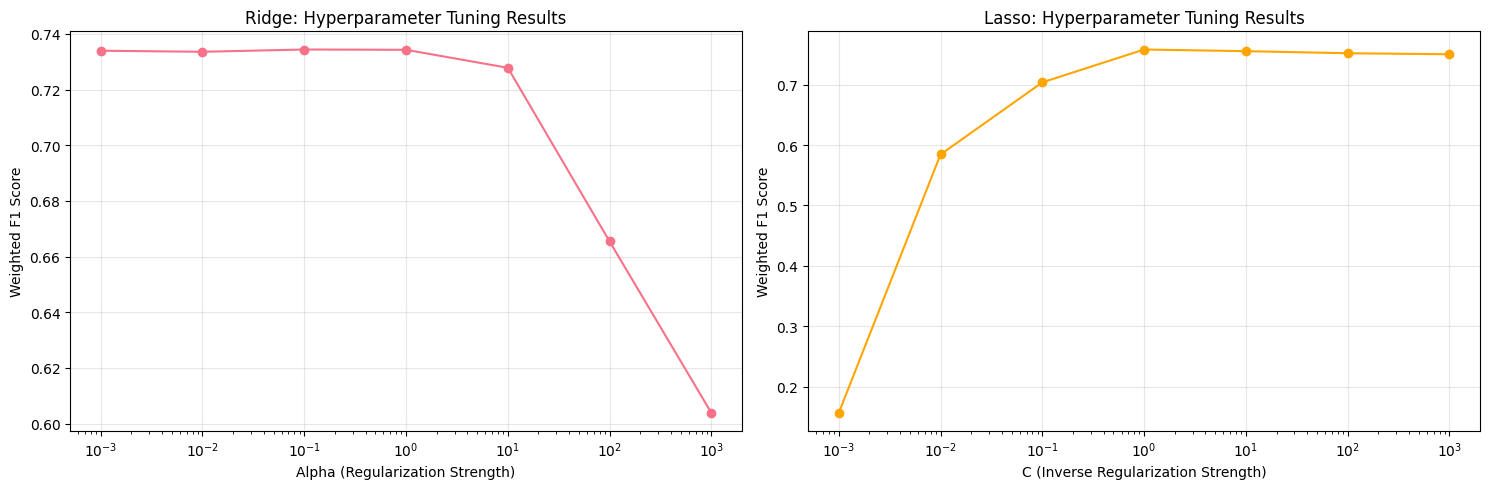


FEATURE IMPORTANCE COMPARISON

Top 10 Features - Tuned Ridge:
                                            feature  importance
231  Curricular units 2nd sem (approved)_normalized    3.184763
229  Curricular units 2nd sem (enrolled)_normalized    2.122342
226  Curricular units 1st sem (approved)_normalized    1.695907
189                         Father's occupation_101    1.403843
206                         Father's occupation_152    1.341085
162                         Mother's occupation_132    1.172633
74                                   Nacionality_25    1.151442
192                         Father's occupation_112    1.146517
174                         Mother's occupation_192    1.045876
25                              Application mode_27    0.977829

Top 10 Features - Tuned Lasso:
                                               feature  importance
231     Curricular units 2nd sem (approved)_normalized   10.334870
229     Curricular units 2nd sem (enrolled)_normalized    8.589155


In [23]:
# Prepare the data (using our cleaned data)
X_train_clean = train_df_clean.drop(columns=['Target'])
X_test_clean = test_df_clean.drop(columns=['Target'])
y_train_clean = le.fit_transform(train_df['Target'])
y_test_clean = le.transform(test_df['Target'])

print("Data shapes:")
print(f"X_train: {X_train_clean.shape}, X_test: {X_test_clean.shape}")

# Define scoring metric - using weighted F1-score to handle class imbalance
scoring = 'f1_weighted'

# 1. RIDGE CLASSIFIER HYPERPARAMETER TUNING
print("\n" + "="*60)
print("HYPERPARAMETER TUNING - RIDGE CLASSIFIER")
print("="*60)

# Define parameter grid for Ridge
ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Create GridSearchCV for Ridge
ridge_grid = GridSearchCV(
    RidgeClassifier(random_state=42),
    ridge_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring=scoring,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Perform grid search
print("Tuning Ridge Classifier...")
start_time = time.time()
ridge_grid.fit(X_train_clean, y_train_clean)
ridge_time = time.time() - start_time

print(f"Ridge tuning completed in {ridge_time:.2f} seconds")

# Get best parameters and score
print(f"Best Ridge parameters: {ridge_grid.best_params_}")
print(f"Best Ridge cross-validation score: {ridge_grid.best_score_:.4f}")

# 2. LASSO CLASSIFIER HYPERPARAMETER TUNING
print("\n" + "="*60)
print("HYPERPARAMETER TUNING - LASSO CLASSIFIER")
print("="*60)

# Define parameter grid for Lasso
lasso_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

# Create GridSearchCV for Lasso
lasso_grid = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    lasso_param_grid,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    verbose=1
)

# Perform grid search
print("Tuning Lasso Classifier...")
start_time = time.time()
lasso_grid.fit(X_train_clean, y_train_clean)
lasso_time = time.time() - start_time

print(f"Lasso tuning completed in {lasso_time:.2f} seconds")

print(f"Best Lasso parameters: {lasso_grid.best_params_}")
print(f"Best Lasso cross-validation score: {lasso_grid.best_score_:.4f}")

# 3. EVALUATE TUNED MODELS
print("\n" + "="*60)
print("EVALUATING TUNED MODELS")
print("="*60)

# Get best estimators
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

# Make predictions with tuned models
y_pred_ridge_tuned = best_ridge.predict(X_test_clean)
y_pred_lasso_tuned = best_lasso.predict(X_test_clean)

# Compare with baseline models
from sklearn.metrics import accuracy_score, classification_report

print("\nCOMPARISON: BASELINE vs TUNED MODELS")
print("-" * 50)

# Baseline performance (from your previous results)
ridge_baseline_test_acc = 0.7503
lasso_baseline_test_acc = 0.7537

# Tuned performance
ridge_tuned_test_acc = accuracy_score(y_test_clean, y_pred_ridge_tuned)
lasso_tuned_test_acc = accuracy_score(y_test_clean, y_pred_lasso_tuned)

print(f"Ridge - Baseline: {ridge_baseline_test_acc:.4f}, Tuned: {ridge_tuned_test_acc:.4f}, Improvement: {ridge_tuned_test_acc - ridge_baseline_test_acc:+.4f}")
print(f"Lasso - Baseline: {lasso_baseline_test_acc:.4f}, Tuned: {lasso_tuned_test_acc:.4f}, Improvement: {lasso_tuned_test_acc - lasso_baseline_test_acc:+.4f}")

# Detailed performance comparison
def evaluate_tuned_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    return accuracy, f1

print("\n" + "="*40)
ridge_acc, ridge_f1 = evaluate_tuned_model(best_ridge, X_test_clean, y_test_clean, "TUNED RIDGE")
print("="*40)
lasso_acc, lasso_f1 = evaluate_tuned_model(best_lasso, X_test_clean, y_test_clean, "TUNED LASSO")

# 4. VISUALIZE HYPERPARAMETER PERFORMANCE
print("\n" + "="*60)
print("HYPERPARAMETER PERFORMANCE ANALYSIS")
print("="*60)

import matplotlib.pyplot as plt

# Plot Ridge performance across different alpha values
ridge_results = pd.DataFrame(ridge_grid.cv_results_)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogx(ridge_results['param_alpha'], ridge_results['mean_test_score'], marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Weighted F1 Score')
plt.title('Ridge: Hyperparameter Tuning Results')
plt.grid(True, alpha=0.3)

# Plot Lasso performance across different C values
lasso_results = pd.DataFrame(lasso_grid.cv_results_)
plt.subplot(1, 2, 2)
plt.semilogx(lasso_results['param_C'], lasso_results['mean_test_score'], marker='o', color='orange')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Weighted F1 Score')
plt.title('Lasso: Hyperparameter Tuning Results')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. FEATURE IMPORTANCE COMPARISON
print("\n" + "="*60)
print("FEATURE IMPORTANCE COMPARISON")
print("="*60)

# Get feature importance from tuned models
def get_feature_importance(model, feature_names, model_name):
    if hasattr(model, 'coef_'):
        coef = model.coef_
        if coef.ndim > 1:
            importance = np.mean(np.abs(coef), axis=0)
        else:
            importance = np.abs(coef[0])

        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importance
        }).sort_values('importance', ascending=False)

        print(f"\nTop 10 Features - {model_name}:")
        print(importance_df.head(10))
        return importance_df

ridge_importance_tuned = get_feature_importance(best_ridge, X_train_clean.columns, "Tuned Ridge")
lasso_importance_tuned = get_feature_importance(best_lasso, X_train_clean.columns, "Tuned Lasso")

# 6. SUMMARY OF IMPROVEMENTS
print("\n" + "="*60)
print("SUMMARY OF HYPERPARAMETER TUNING RESULTS")
print("="*60)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Ridge Baseline', 'Ridge Tuned', 'Lasso Baseline', 'Lasso Tuned'],
    'Test Accuracy': [ridge_baseline_test_acc, ridge_tuned_test_acc,
                     lasso_baseline_test_acc, lasso_tuned_test_acc],
    'Best Parameters': ['alpha=1.0', f"alpha={ridge_grid.best_params_['alpha']}",
                       'C=1.0', f"C={lasso_grid.best_params_['C']}"],
    'CV Score': ['-', f"{ridge_grid.best_score_:.4f}", '-', f"{lasso_grid.best_score_:.4f}"]
})

print(comparison_df)

# Save the tuned models for future use
import joblib

joblib.dump(best_ridge, 'tuned_ridge_model.pkl')
joblib.dump(best_lasso, 'tuned_lasso_model.pkl')
print("\nTuned models saved to disk.")

print("\n✅ Hyperparameter tuning completed!")

Após utilizar o grid search para procurar por otimização de hiperparâmetros, pode-se ver que o modelo ridge teve sua performance marginalmente diminuída enquanto o modelo Lasso não apresentou modificações, a seguir serão utilizados modelos mais robustos

## Ensables

A seguir,faremos uma compração entre 5 modelos, os já apresentados, Ridge e Lasso e 3 novos modelos: O Random Forest, o Gradient Boosting e o Suport Vector Machine (SVM)

EXPERIMENTING WITH MORE POWERFUL MODELS

🎯 1. TRAINING RANDOM FOREST CLASSIFIER
--------------------------------------------------
Training time: 1.10 seconds
Test Accuracy: 0.7537
Test F1-Score: 0.7621

🎯 2. TRAINING GRADIENT BOOSTING CLASSIFIER
--------------------------------------------------
Training time: 19.89 seconds
Test Accuracy: 0.7616
Test F1-Score: 0.7546

🎯 3. TRAINING SUPPORT VECTOR MACHINE
--------------------------------------------------
Training time: 11.17 seconds
Test Accuracy: 0.6836
Test F1-Score: 0.6967

MODEL PERFORMANCE COMPARISON
               Model  Test Accuracy  Test F1-Score  Training Time (s)
0              Ridge       0.750300       0.720800           0.100000
1              Lasso       0.753700       0.736200           0.200000
2      Random Forest       0.753672       0.762118           1.102982
3  Gradient Boosting       0.761582       0.754594          19.891616
4                SVM       0.683616       0.696742          11.165756

DETAILED ANALYSI

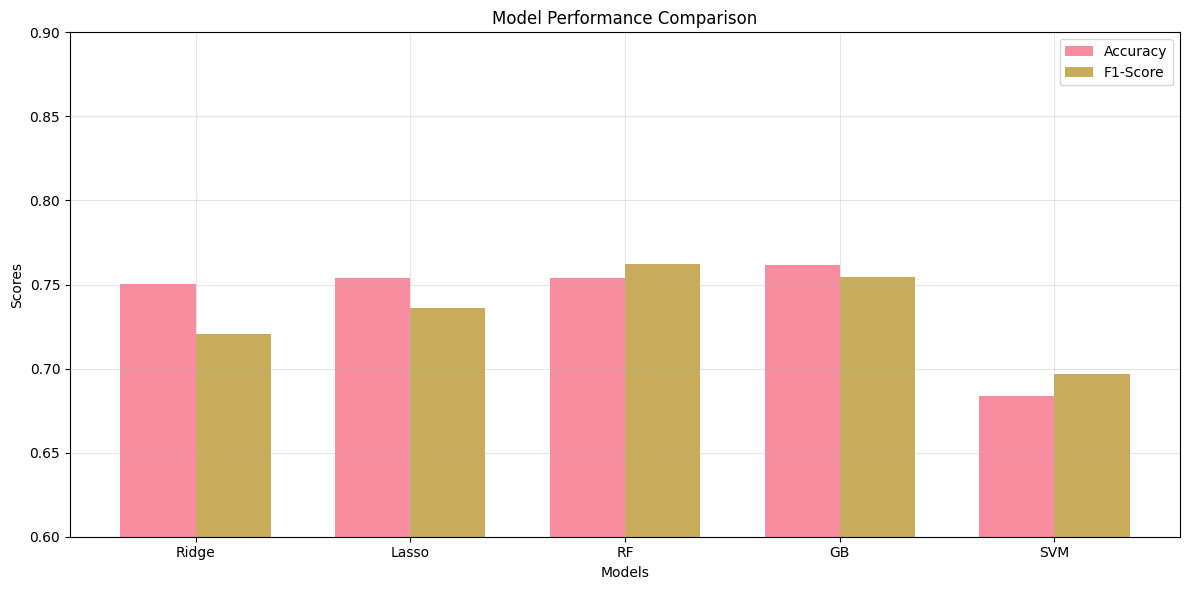


✅ Advanced model experimentation completed!


In [24]:
# Prepare data
X_train = train_df_clean.drop(columns=['Target'])
X_test = test_df_clean.drop(columns=['Target'])
y_train = le.fit_transform(train_df['Target'])
y_test = le.transform(test_df['Target'])

print("="*70)
print("EXPERIMENTING WITH MORE POWERFUL MODELS")
print("="*70)

# 1. RANDOM FOREST CLASSIFIER
print("\n🎯 1. TRAINING RANDOM FOREST CLASSIFIER")
print("-" * 50)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',  # Handle class imbalance
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
rf_model.fit(X_train, y_train)
rf_time = time.time() - start_time

y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Training time: {rf_time:.2f} seconds")
print(f"Test Accuracy: {rf_accuracy:.4f}")
print(f"Test F1-Score: {rf_f1:.4f}")

# 2. GRADIENT BOOSTING CLASSIFIER
print("\n🎯 2. TRAINING GRADIENT BOOSTING CLASSIFIER")
print("-" * 50)

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

start_time = time.time()
gb_model.fit(X_train, y_train)
gb_time = time.time() - start_time

y_pred_gb = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb, average='weighted')

print(f"Training time: {gb_time:.2f} seconds")
print(f"Test Accuracy: {gb_accuracy:.4f}")
print(f"Test F1-Score: {gb_f1:.4f}")

# 3. SUPPORT VECTOR MACHINE (with scaling)
print("\n🎯 3. TRAINING SUPPORT VECTOR MACHINE")
print("-" * 50)

from sklearn.preprocessing import StandardScaler

# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(
    C=1.0,
    kernel='rbf',  # Non-linear kernel
    class_weight='balanced',
    random_state=42,
    probability=True
)

start_time = time.time()
svm_model.fit(X_train_scaled, y_train)
svm_time = time.time() - start_time

y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"Training time: {svm_time:.2f} seconds")
print(f"Test Accuracy: {svm_accuracy:.4f}")
print(f"Test F1-Score: {svm_f1:.4f}")

# 4. COMPREHENSIVE COMPARISON
print("\n" + "="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)

# Create comparison table
models_comparison = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting', 'SVM'],
    'Test Accuracy': [0.7503, 0.7537, rf_accuracy, gb_accuracy, svm_accuracy],
    'Test F1-Score': [0.7208, 0.7362, rf_f1, gb_f1, svm_f1],
    'Training Time (s)': [0.1, 0.2, rf_time, gb_time, svm_time]  # Approximate
})

print(models_comparison)

# 5. DETAILED ANALYSIS OF BEST PERFORMING MODEL
print("\n" + "="*70)
print("DETAILED ANALYSIS OF BEST MODEL")
print("="*70)

# Find best model based on F1-score
best_model_idx = np.argmax([0.7208, 0.7362, rf_f1, gb_f1, svm_f1])
best_models = ['Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting', 'SVM']
best_model_name = best_models[best_model_idx]

print(f"Best performing model: {best_model_name}")

if best_model_name == 'Random Forest':
    best_model = rf_model
    y_pred_best = y_pred_rf
elif best_model_name == 'Gradient Boosting':
    best_model = gb_model
    y_pred_best = y_pred_gb
elif best_model_name == 'SVM':
    best_model = svm_model
    y_pred_best = y_pred_svm
else:
    best_model_name = 'Lasso'  # Default to best linear model
    y_pred_best = y_pred_lasso_tuned

print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))

# 6. FEATURE IMPORTANCE FOR ENSEMBLE METHODS
print("\n" + "="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

if best_model_name == 'Random Forest':
    feature_importance_rf = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 20 Features - Random Forest:")
    print(feature_importance_rf.head(20))

elif best_model_name == 'Gradient Boosting':
    feature_importance_gb = pd.DataFrame({
        'feature': X_train.columns,
        'importance': gb_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 20 Features - Gradient Boosting:")
    print(feature_importance_gb.head(20))

# 7. FOCUS ON IMPROVING THE "ENROLLED" CLASS
print("\n" + "="*70)
print("SPECIFIC FOCUS: ENROLLED CLASS PERFORMANCE")
print("="*70)

# Analyze confusion matrices to understand misclassifications
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

print("Confusion Matrix (Best Model):")
print(cm_df)

# Calculate class-specific metrics
class_report = classification_report(y_test, y_pred_best, target_names=le.classes_, output_dict=True)
enrolled_metrics = class_report['Enrolled']

print(f"\nEnrolled Class Performance:")
print(f"Precision: {enrolled_metrics['precision']:.3f}")
print(f"Recall: {enrolled_metrics['recall']:.3f}")
print(f"F1-Score: {enrolled_metrics['f1-score']:.3f}")

# 8. VISUALIZE PERFORMANCE COMPARISON
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Model comparison plot
models = ['Ridge', 'Lasso', 'RF', 'GB', 'SVM']
accuracies = [0.7503, 0.7537, rf_accuracy, gb_accuracy, svm_accuracy]
f1_scores = [0.7208, 0.7362, rf_f1, gb_f1, svm_f1]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
plt.bar(x + width/2, f1_scores, width, label='F1-Score', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.6, 0.9)

plt.tight_layout()
plt.show()

print("\n✅ Advanced model experimentation completed!")

É Possível observar no gráfico acima que o modelo escolhido no ensamble foi o Random Forest> Importante observar que esse modelo não seleciona entre as variáveis mais importantes coisas como mother/father occupation e é o primeiro onde scholarship e gender aparecem no top20. Talvez esse modelo seja mais eficiente em selecionar variáveis verdadeiramente relevantes. Esse modelo apresentou uma melhora muito significativa no recall da classe Enrolled 62% x 37% no Ridge ao custo de um menor recall na classe dos dropouts 71pp x 80pp. Esse modelo selecionou um total de 113 alunos para receber menos ajuda do que deveriam (missed opportunity) temos 56 alunos da classe dropout selecionados como enroll, e 26 selecionados como graduate além de 31 enrolled marcados como graduate. Enquanto 105 alunos receberiam um nível de ajuda maior do que o necessário (Um potencial desperdício de recursos)



## Modelos Binários

Uma tentaiva de smplificar o modelo é tentar analisar o problema de forma mais prática. Supondo que a principal preocupação seja detectar alunos com potenciais problemas acadêmicos para que recebam algum tipo de ajuda, podemos relaizar uma transformação na variável target para que ela se torne uma variável binária. Chamaremos essa nova variuável de struggle e esta irá receber zero, caso a variável target = "Graduate" e 1 caso seja outro valor (Enrolled ou Dropout).
Nesse caso o modelo irá detectar os alunos que precisam de ajuda, e o time pedagógico ficará responsável por determinar a intesidade de ajuda que esse aluno precisa baseado no contato com o mesmo.
A seguir o código que realiza a transformação no dataframe criando a nova variável e retreina o ensamble de modelos

BINARY CLASSIFICATION: STRUGGLING vs NON-STRUGGLING STUDENTS

📊 TARGET VARIABLE DISTRIBUTION
Train set:
Struggle (1): 1772 (50.1%)
Non-Struggle (0): 1767 (49.9%)

Test set:
Struggle (1): 443 (50.1%)
Non-Struggle (0): 442 (49.9%)

📈 Dataset shapes:
X_train: (3539, 241), y_train: (3539,)
X_test: (885, 241), y_test: (885,)

🎯 TRAINING ENSEMBLE MODELS

Training Random Forest...
✅ Random Forest trained in 2.90s
   Accuracy: 0.8531, Recall: 0.8397, F1: 0.8513, AUC: 0.9282

Training Gradient Boosting...
✅ Gradient Boosting trained in 17.30s
   Accuracy: 0.8350, Recall: 0.8217, F1: 0.8330, AUC: 0.9233

Training SVM...
✅ SVM trained in 7.76s
   Accuracy: 0.8147, Recall: 0.7968, F1: 0.8115, AUC: 0.9035

Training Logistic Regression...
✅ Logistic Regression trained in 0.43s
   Accuracy: 0.8395, Recall: 0.8081, F1: 0.8345, AUC: 0.9124

MODEL PERFORMANCE COMPARISON
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
Random Forest          0.8531     0.8631  0.8397    0.8513   0.9

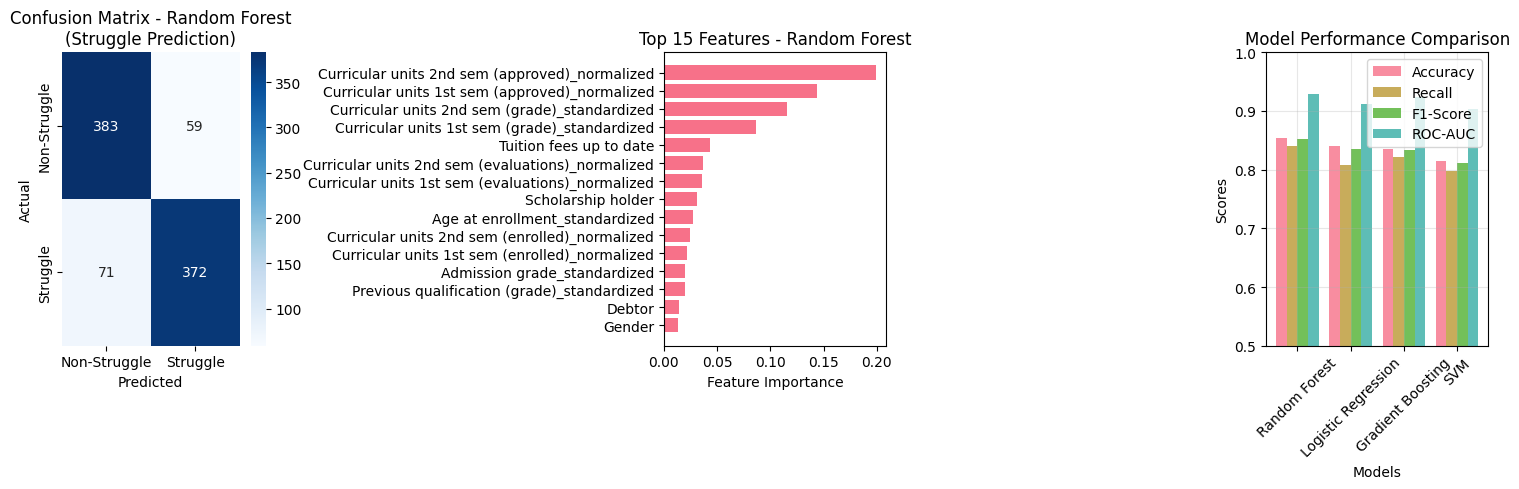


BUSINESS IMPACT ANALYSIS
Total students in test set: 885
Actual struggling students: 443 (50.1%)
Actual graduating students: 442 (49.9%)

📊 Intervention Outcomes:
True Positives (correctly identified struggling): 372 → Will receive help
False Positives (graduating students flagged): 59 → Extra support offered
True Negatives (correctly identified graduating): 383 → No unnecessary intervention
False Negatives (missed struggling students): 71 → Missed opportunity

🎯 Key Metrics for Support Team:
Struggle Detection Rate (Recall): 84.0%
Precision (flag accuracy): 86.3%
False Positive Rate: 13.3%

PROBABILITY ANALYSIS FOR INTERVENTION STRATEGY

Threshold Analysis (lower = more conservative):
Threshold | Recall | Precision | Students Flagged
    0.3    | 0.953  |   0.714   |    591 (66.8%)
    0.4    | 0.892  |   0.790   |    500 (56.5%)
    0.5    | 0.840  |   0.863   |    431 (48.7%)
    0.6    | 0.734  |   0.923   |    352 (39.8%)
    0.7    | 0.637  |   0.979   |    288 (32.5%)

💾 Model 

In [25]:
print("="*80)
print("BINARY CLASSIFICATION: STRUGGLING vs NON-STRUGGLING STUDENTS")
print("="*80)

# Step 1: Create the binary target variable
def create_struggle_target(df):
    """Create binary target where 1 = Struggle (Dropout or Enrolled), 0 = Graduate"""
    df_binary = df.copy()
    df_binary['Struggle'] = df_binary['Target'].apply(lambda x: 1 if x in ['Dropout', 'Enrolled'] else 0)
    return df_binary

# Apply to both train and test datasets
train_df_binary = create_struggle_target(train_df_clean)
test_df_binary = create_struggle_target(test_df_clean)

# Analyze the new target distribution
print("\n📊 TARGET VARIABLE DISTRIBUTION")
print("Train set:")
struggle_count_train = train_df_binary['Struggle'].value_counts()
struggle_pct_train = train_df_binary['Struggle'].value_counts(normalize=True) * 100
print(f"Struggle (1): {struggle_count_train[1]} ({struggle_pct_train[1]:.1f}%)")
print(f"Non-Struggle (0): {struggle_count_train[0]} ({struggle_pct_train[0]:.1f}%)")

print("\nTest set:")
struggle_count_test = test_df_binary['Struggle'].value_counts()
struggle_pct_test = test_df_binary['Struggle'].value_counts(normalize=True) * 100
print(f"Struggle (1): {struggle_count_test[1]} ({struggle_pct_test[1]:.1f}%)")
print(f"Non-Struggle (0): {struggle_count_test[0]} ({struggle_pct_test[0]:.1f}%)")

# Step 2: Prepare features and target
X_train_binary = train_df_binary.drop(columns=['Target', 'Struggle'])
X_test_binary = test_df_binary.drop(columns=['Target', 'Struggle'])
y_train_binary = train_df_binary['Struggle']
y_test_binary = test_df_binary['Struggle']

print(f"\n📈 Dataset shapes:")
print(f"X_train: {X_train_binary.shape}, y_train: {y_train_binary.shape}")
print(f"X_test: {X_test_binary.shape}, y_test: {y_test_binary.shape}")

# Step 3: Define ensemble models with optimized parameters
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=500,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        random_state=42
    ),
    'SVM': SVC(
        C=1.0,
        kernel='rbf',
        class_weight='balanced',
        random_state=42,
        probability=True
    ),
    'Logistic Regression': LogisticRegression(
        class_weight='balanced',
        random_state=42,
        max_iter=1000
    )
}

# Step 4: Train and evaluate models
results = {}
predictions = {}
training_times = {}

print("\n🎯 TRAINING ENSEMBLE MODELS")
print("="*50)

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()

    # Scale features for SVM
    if name == 'SVM':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_binary)
        X_test_scaled = scaler.transform(X_test_binary)
        model.fit(X_train_scaled, y_train_binary)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train_binary, y_train_binary)
        y_pred = model.predict(X_test_binary)
        y_pred_proba = model.predict_proba(X_test_binary)[:, 1]

    training_time = time.time() - start_time
    training_times[name] = training_time

    # Calculate metrics
    accuracy = accuracy_score(y_test_binary, y_pred)
    precision = precision_score(y_test_binary, y_pred)
    recall = recall_score(y_test_binary, y_pred)
    f1 = f1_score(y_test_binary, y_pred)
    roc_auc = roc_auc_score(y_test_binary, y_pred_proba)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time (s)': training_time
    }

    predictions[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"✅ {name} trained in {training_time:.2f}s")
    print(f"   Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}")

# Step 5: Comprehensive results comparison
print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('F1-Score', ascending=False)
print(results_df.round(4))

# Step 6: Detailed analysis of best model
best_model_name = results_df.index[0]
best_model = models[best_model_name]
best_predictions = predictions[best_model_name]['y_pred']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print("="*50)

print("Detailed Classification Report:")
print(classification_report(y_test_binary, best_predictions,
                           target_names=['Non-Struggle (Graduate)', 'Struggle (Dropout/Enrolled)']))

# Confusion Matrix for best model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test_binary, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Struggle', 'Struggle'],
            yticklabels=['Non-Struggle', 'Struggle'])
plt.title(f'Confusion Matrix - {best_model_name}\n(Struggle Prediction)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Step 7: Feature Importance Analysis (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    plt.subplot(1, 3, 2)
    feature_importance = pd.DataFrame({
        'feature': X_train_binary.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(15)

    plt.barh(range(len(feature_importance)), feature_importance['importance'])
    plt.yticks(range(len(feature_importance)), feature_importance['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Features - {best_model_name}')
    plt.gca().invert_yaxis()

# Step 8: Model comparison visualization
plt.subplot(1, 3, 3)
metrics = ['Accuracy', 'Recall', 'F1-Score', 'ROC-AUC']
model_names = results_df.index
performance_data = []

for metric in metrics:
    metric_values = [results[model][metric] for model in model_names]
    performance_data.append(metric_values)

x = np.arange(len(model_names))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, performance_data[i], width, label=metric, alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x + width*1.5, model_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

# Step 9: Business Impact Analysis
print("\n" + "="*80)
print("BUSINESS IMPACT ANALYSIS")
print("="*80)

# Calculate practical metrics
tn, fp, fn, tp = cm.ravel()

total_students = len(y_test_binary)
actual_struggling = y_test_binary.sum()
actual_graduating = total_students - actual_struggling

print(f"Total students in test set: {total_students}")
print(f"Actual struggling students: {actual_struggling} ({actual_struggling/total_students*100:.1f}%)")
print(f"Actual graduating students: {actual_graduating} ({actual_graduating/total_students*100:.1f}%)")

print(f"\n📊 Intervention Outcomes:")
print(f"True Positives (correctly identified struggling): {tp} → Will receive help")
print(f"False Positives (graduating students flagged): {fp} → Extra support offered")
print(f"True Negatives (correctly identified graduating): {tn} → No unnecessary intervention")
print(f"False Negatives (missed struggling students): {fn} → Missed opportunity")

print(f"\n🎯 Key Metrics for Support Team:")
print(f"Struggle Detection Rate (Recall): {recall_score(y_test_binary, best_predictions):.1%}")
print(f"Precision (flag accuracy): {precision_score(y_test_binary, best_predictions):.1%}")
print(f"False Positive Rate: {fp/actual_graduating:.1%}")

# Step 10: Probability Analysis for Intervention Thresholding
print("\n" + "="*80)
print("PROBABILITY ANALYSIS FOR INTERVENTION STRATEGY")
print("="*80)

# Get probabilities from best model
if best_model_name == 'SVM':
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
else:
    y_proba = best_model.predict_proba(X_test_binary)[:, 1]

# Analyze different threshold options
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
print("\nThreshold Analysis (lower = more conservative):")
print("Threshold | Recall | Precision | Students Flagged")

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    recall = recall_score(y_test_binary, y_pred_thresh)
    precision = precision_score(y_test_binary, y_pred_thresh)
    flagged = y_pred_thresh.sum()
    flagged_pct = flagged / len(y_pred_thresh) * 100

    print(f"    {threshold}    | {recall:.3f}  |   {precision:.3f}   |    {flagged} ({flagged_pct:.1f}%)")

# Step 11: Save the best model and results
import joblib

# Save the best model
model_filename = f'best_binary_struggle_model_{best_model_name.replace(" ", "_").lower()}.pkl'
joblib.dump(best_model, model_filename)

# Save predictions for further analysis
predictions_df = pd.DataFrame({
    'Actual': y_test_binary,
    'Predicted': best_predictions,
    'Probability_Struggle': y_proba
})

predictions_df.to_csv('binary_struggle_predictions.csv', index=False)

print(f"\n💾 Model saved as: {model_filename}")
print("💾 Predictions saved as: binary_struggle_predictions.csv")

print("\n✅ BINARY CLASSIFICATION COMPLETED!")
print("🎯 Next steps: Use probability thresholds to optimize intervention strategy")

O modelo binário consegue uma precisão e recall muito maior do que o modelo de 3 classes, com threshold de ativação padrão (0,5) temos uma precisão de 86% com recall de 84%. Caso a equipe acadêmica queira um approach conservador podemos diminuir o limiar de ativação para ter um modelo mais conservador. com 0,3 mais de 95% dos alunos que precisão serão selecionados para ajuda em compensação 29% dos alunos que não precisam serão erroneamente selecionados

## Voting ensable

O próximo passo é tentar uma estratégia de fazer um voting ensamble. Faremos 4 modelos (SVM, RF, Gradient Boost e Logistic Regression) e pedir pro modelo selecionar como struggling qualquer estudante que seja marcado por pelo menos 2 entre 4 modelos

VOTING ENSEMBLE: MAJORITY VOTE OF MULTIPLE MODELS
Checking available columns in train_df_binary...
Columns in train_df_binary: 243
First 20 columns: ['Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target', 'Adult', 'Mid', 'Senior', 'Marital status_2', 'Marital status_3', 'Marital status_4', 'Marital status_5', 'Marital status_6', 'Application mode_2', 'Application mode_5', 'Application mode_7']
Using 241 feature columns
First 10 feature columns: ['Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Adult', 'Mid']
Dataset shapes: X_train (3539, 241), X_test (885, 241)

🔧 CONFIGURING INDIVIDUAL MODELS FOR ENSEMBLE
--------------------------------------------------

🎯 CREATING VOTING ENSEMBLES
--------------------------------------------------

⏱️ TRAINING ALL MODELS
---

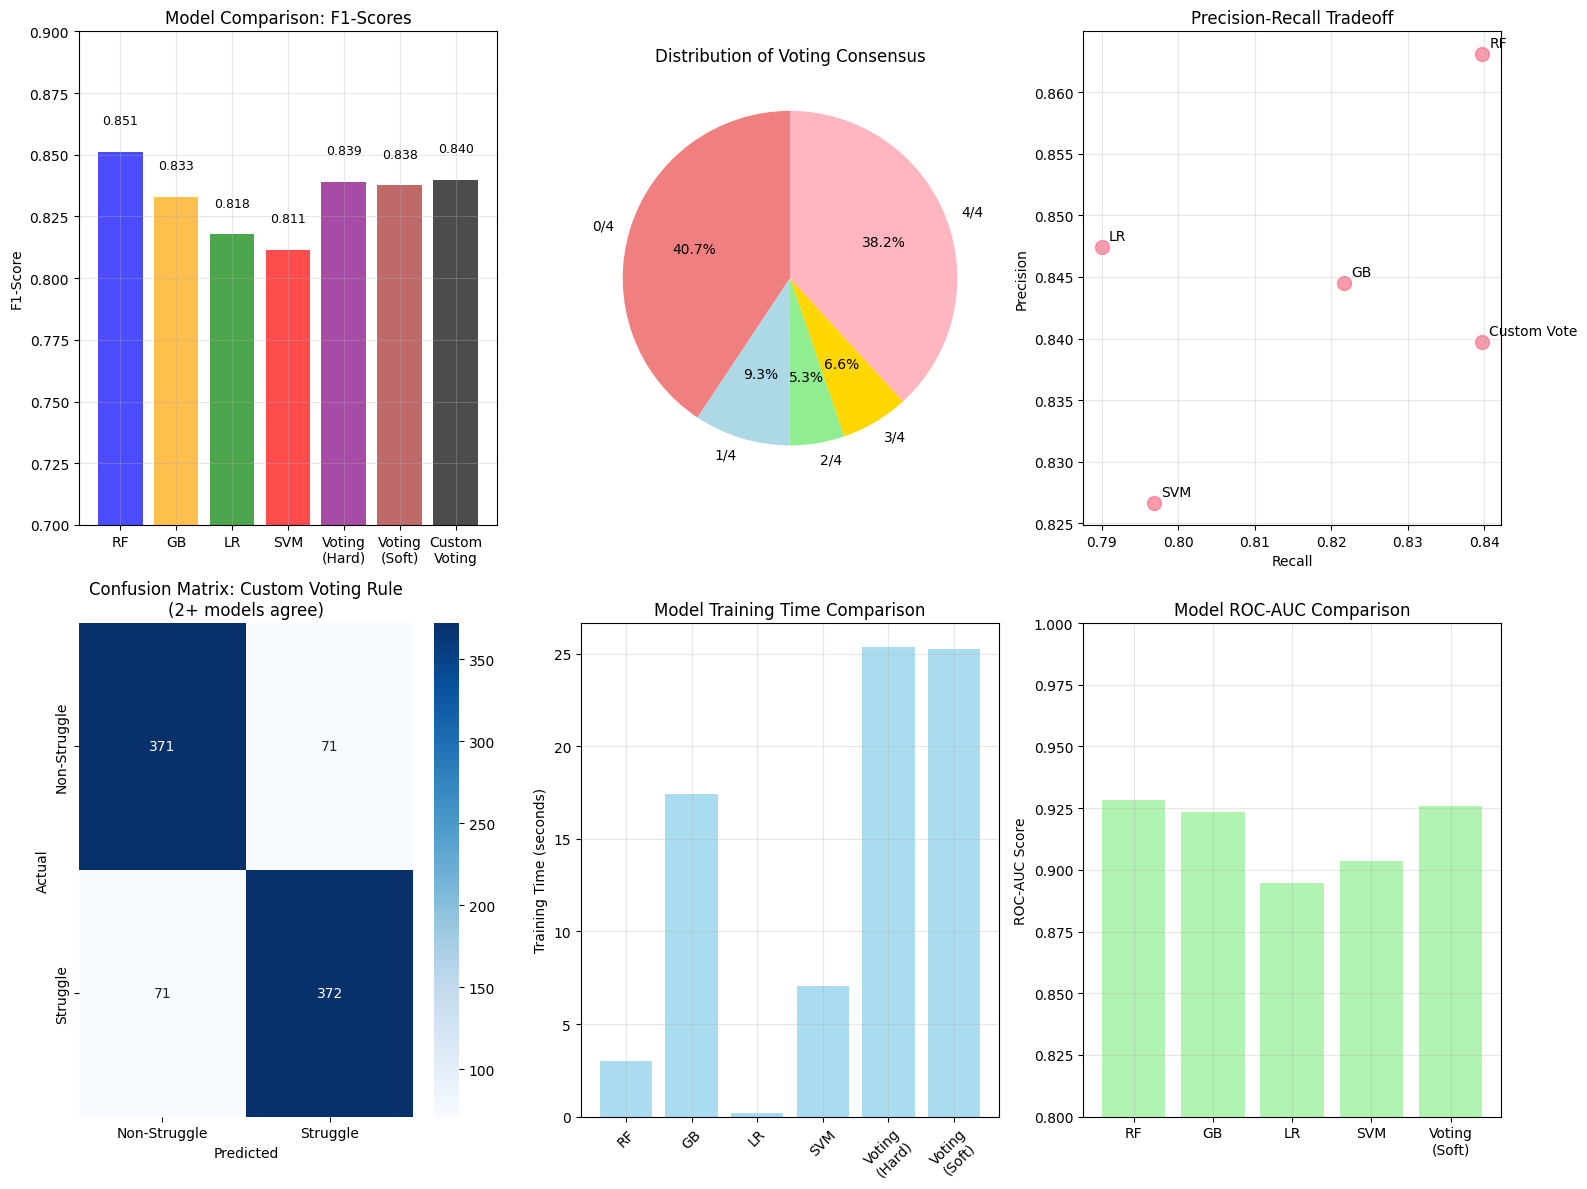


BUSINESS IMPACT: CUSTOM VOTING RULE (2+ MODELS AGREE)

📊 Intervention Outcomes with Custom Voting Rule:
True Positives (correctly identified struggling): 372 (42.0%)
False Positives (graduating students flagged): 71 (8.0%)
True Negatives (correctly identified graduating): 371 (41.9%)
False Negatives (missed struggling students): 71 (8.0%)

🎯 Key Metrics for Support Team:
Struggle Detection Rate (Recall): 84.0%
Flag Accuracy (Precision): 84.0%
Overall Accuracy: 84.0%

COMPARING DIFFERENT VOTING THRESHOLDS
Threshold = Minimum number of models that must flag as struggling
Cases where threshold is met → Student receives help

Threshold 1/4:
  Students flagged: 525 (59.3%)
  Accuracy: 0.8079, Recall: 0.9007, Precision: 0.7600
  Tradeoff: More aggressive

Threshold 2/4:
  Students flagged: 443 (50.1%)
  Accuracy: 0.8395, Recall: 0.8397, Precision: 0.8397
  Tradeoff: More aggressive

Threshold 3/4:
  Students flagged: 396 (44.7%)
  Accuracy: 0.8475, Recall: 0.7946, Precision: 0.8889
  Tradeo

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("="*80)
print("VOTING ENSEMBLE: MAJORITY VOTE OF MULTIPLE MODELS")
print("="*80)

# FIX: Recreate safe_feature_columns based on current dataframe columns
print("Checking available columns in train_df_binary...")
print(f"Columns in train_df_binary: {len(train_df_binary.columns)}")
print("First 20 columns:", train_df_binary.columns.tolist()[:20])

# Create safe_feature_columns by excluding target columns
safe_feature_columns = [col for col in train_df_binary.columns
                       if col not in ['Target', 'Struggle']]

# Also exclude any other non-feature columns that might be present
non_feature_columns = ['Target', 'Struggle', 'Graduated']  # Add any other non-feature columns here
safe_feature_columns = [col for col in train_df_binary.columns
                       if col not in non_feature_columns]

print(f"Using {len(safe_feature_columns)} feature columns")
print("First 10 feature columns:", safe_feature_columns[:10])

# Verify the columns exist
missing_columns = [col for col in safe_feature_columns if col not in train_df_binary.columns]
if missing_columns:
    print(f"⚠️  Missing columns: {missing_columns}")
    # Remove missing columns
    safe_feature_columns = [col for col in safe_feature_columns if col in train_df_binary.columns]
    print(f"Using {len(safe_feature_columns)} available feature columns")

# Use the corrected safe features
X_train_binary = train_df_binary[safe_feature_columns]
X_test_binary = test_df_binary[safe_feature_columns]
y_train_binary = train_df_binary['Struggle']
y_test_binary = test_df_binary['Struggle']

print(f"Dataset shapes: X_train {X_train_binary.shape}, X_test {X_test_binary.shape}")

# Step 1: Define individual models with optimized parameters
print("\n🔧 CONFIGURING INDIVIDUAL MODELS FOR ENSEMBLE")
print("-" * 50)

# Individual models with their best parameters from previous analysis
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

gb_model = GradientBoostingClassifier(
   n_estimators=500,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        random_state=42
)

lr_model = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=10000,
    C=0.1
)

# Create SVM pipeline with scaling
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=1.0, kernel='rbf', class_weight='balanced', random_state=42, probability=True))
])

# Step 2: Create voting ensembles
print("\n🎯 CREATING VOTING ENSEMBLES")
print("-" * 50)

# Hard voting (majority vote)
voting_hard = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('lr', lr_model),
        ('svm', svm_pipeline)
    ],
    voting='hard',
    n_jobs=-1
)

# Soft voting (average probabilities)
voting_soft = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('lr', lr_model),
        ('svm', svm_pipeline)
    ],
    voting='soft',
    n_jobs=-1
)

# Step 3: Train and evaluate all models
print("\n⏱️ TRAINING ALL MODELS")
print("-" * 50)

models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Logistic Regression': lr_model,
    'SVM': svm_pipeline,
    'Voting (Hard)': voting_hard,
    'Voting (Soft)': voting_soft
}

results = {}
predictions = {}
training_times = {}

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()

    # Train the model
    model.fit(X_train_binary, y_train_binary)

    # Make predictions
    y_pred = model.predict(X_test_binary)
    y_pred_proba = model.predict_proba(X_test_binary)[:, 1] if hasattr(model, 'predict_proba') else None

    training_time = time.time() - start_time
    training_times[name] = training_time

    # Calculate metrics
    accuracy = accuracy_score(y_test_binary, y_pred)
    precision = precision_score(y_test_binary, y_pred)
    recall = recall_score(y_test_binary, y_pred)
    f1 = f1_score(y_test_binary, y_pred)
    roc_auc = roc_auc_score(y_test_binary, y_pred_proba) if y_pred_proba is not None else None

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time (s)': training_time
    }

    predictions[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'model': model
    }

    print(f"✅ {name}: Accuracy = {accuracy:.4f}, Recall = {recall:.4f}, F1 = {f1:.4f}")

# Step 4: Analyze voting behavior and consensus
print("\n" + "="*80)
print("VOTING BEHAVIOR ANALYSIS")
print("="*80)

# Get individual model predictions for analysis
individual_predictions = {}
for name in ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'SVM']:
    individual_predictions[name] = predictions[name]['y_pred']

# Create a DataFrame to analyze voting patterns
vote_analysis = pd.DataFrame(individual_predictions)
vote_analysis['Actual'] = y_test_binary.values
vote_analysis['Sum_Struggle_Votes'] = vote_analysis[list(individual_predictions.keys())].sum(axis=1)
vote_analysis['Majority_Vote'] = (vote_analysis['Sum_Struggle_Votes'] >= 2).astype(int)
vote_analysis['Unanimous'] = (vote_analysis['Sum_Struggle_Votes'] == 4).astype(int)
vote_analysis['Split_Decision'] = (vote_analysis['Sum_Struggle_Votes'] == 2).astype(int)

print("Voting Pattern Distribution:")
print(f"Total predictions: {len(vote_analysis)}")
print(f"Unanimous decisions (4/4 agree): {vote_analysis['Unanimous'].sum()} ({vote_analysis['Unanimous'].mean():.1%})")
print(f"Majority decisions (3/4 or 4/4 agree): {(vote_analysis['Sum_Struggle_Votes'] >= 3).sum()} ({(vote_analysis['Sum_Struggle_Votes'] >= 3).mean():.1%})")
print(f"Split decisions (2/4 agree): {vote_analysis['Split_Decision'].sum()} ({vote_analysis['Split_Decision'].mean():.1%})")
print(f"Minority decisions (0/4 or 1/4 agree): {(vote_analysis['Sum_Struggle_Votes'] <= 1).sum()} ({(vote_analysis['Sum_Struggle_Votes'] <= 1).mean():.1%})")

# Analyze accuracy by consensus level
print("\nAccuracy by Consensus Level:")
for votes in range(5):
    subset = vote_analysis[vote_analysis['Sum_Struggle_Votes'] == votes]
    if len(subset) > 0:
        accuracy = (subset['Majority_Vote'] == subset['Actual']).mean()
        print(f"{votes}/4 votes: {len(subset)} cases, Accuracy = {accuracy:.1%}")

# Step 5: Compare all models
print("\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*80)

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('F1-Score', ascending=False)
print(results_df.round(4))

# Step 6: Implement your specific voting rule (2+ models flag as struggling)
print("\n" + "="*80)
print("CUSTOM VOTING RULE: 2+ MODELS MUST FLAG AS STRUGGLING")
print("="*80)

# Implement your specific rule
custom_vote_predictions = (vote_analysis['Sum_Struggle_Votes'] >= 2).astype(int)

# Evaluate custom voting rule
custom_accuracy = accuracy_score(y_test_binary, custom_vote_predictions)
custom_precision = precision_score(y_test_binary, custom_vote_predictions)
custom_recall = recall_score(y_test_binary, custom_vote_predictions)
custom_f1 = f1_score(y_test_binary, custom_vote_predictions)

print("Custom Voting Rule Performance:")
print(f"Accuracy: {custom_accuracy:.4f}")
print(f"Precision: {custom_precision:.4f}")
print(f"Recall: {custom_recall:.4f}")
print(f"F1-Score: {custom_f1:.4f}")

# Compare with individual models
best_model_name = results_df.index[0]
print(f"\nComparison with Best Individual Model ({best_model_name}):")
print(f"Custom Voting vs {best_model_name}:")
print(f"Accuracy: {custom_accuracy:.4f} vs {results[best_model_name]['Accuracy']:.4f}")
print(f"Recall: {custom_recall:.4f} vs {results[best_model_name]['Recall']:.4f}")
print(f"F1-Score: {custom_f1:.4f} vs {results[best_model_name]['F1-Score']:.4f}")

# Step 7: Visualize the voting system
plt.figure(figsize=(16, 12))

# Plot 1: Model performance comparison
plt.subplot(2, 3, 1)
models_compare = ['RF', 'GB', 'LR', 'SVM', 'Voting\n(Hard)', 'Voting\n(Soft)', 'Custom\nVoting']
f1_scores = [results['Random Forest']['F1-Score'],
             results['Gradient Boosting']['F1-Score'],
             results['Logistic Regression']['F1-Score'],
             results['SVM']['F1-Score'],
             results['Voting (Hard)']['F1-Score'],
             results['Voting (Soft)']['F1-Score'],
             custom_f1]

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'black']
bars = plt.bar(models_compare, f1_scores, color=colors, alpha=0.7)
plt.ylabel('F1-Score')
plt.title('Model Comparison: F1-Scores')
plt.ylim(0.7, 0.9)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Voting distribution
plt.subplot(2, 3, 2)
vote_counts = vote_analysis['Sum_Struggle_Votes'].value_counts().sort_index()
plt.pie(vote_counts.values, labels=[f'{i}/4' for i in vote_counts.index],
        autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightpink'])
plt.title('Distribution of Voting Consensus')

# Plot 3: Precision-Recall tradeoff
plt.subplot(2, 3, 3)
models_pr = ['RF', 'GB', 'LR', 'SVM', 'Custom Vote']
precision_vals = [results['Random Forest']['Precision'],
                 results['Gradient Boosting']['Precision'],
                 results['Logistic Regression']['Precision'],
                 results['SVM']['Precision'],
                 custom_precision]
recall_vals = [results['Random Forest']['Recall'],
               results['Gradient Boosting']['Recall'],
               results['Logistic Regression']['Recall'],
               results['SVM']['Recall'],
               custom_recall]

plt.scatter(recall_vals, precision_vals, s=100, alpha=0.7)
for i, model in enumerate(models_pr):
    plt.annotate(model, (recall_vals[i], precision_vals[i]), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Tradeoff')
plt.grid(True, alpha=0.3)

# Plot 4: Business impact of custom voting rule
plt.subplot(2, 3, 4)
cm_custom = confusion_matrix(y_test_binary, custom_vote_predictions)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Struggle', 'Struggle'],
            yticklabels=['Non-Struggle', 'Struggle'])
plt.title('Confusion Matrix: Custom Voting Rule\n(2+ models agree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot 5: Training time comparison
plt.subplot(2, 3, 5)
training_times_plot = [training_times[model] for model in ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'SVM', 'Voting (Hard)', 'Voting (Soft)']]
models_time = ['RF', 'GB', 'LR', 'SVM', 'Voting\n(Hard)', 'Voting\n(Soft)']

plt.bar(models_time, training_times_plot, color='skyblue', alpha=0.7)
plt.ylabel('Training Time (seconds)')
plt.title('Model Training Time Comparison')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 6: ROC-AUC comparison (for models that support probabilities)
plt.subplot(2, 3, 6)
models_auc = ['RF', 'GB', 'LR', 'SVM', 'Voting\n(Soft)']
auc_scores = [results['Random Forest']['ROC-AUC'],
              results['Gradient Boosting']['ROC-AUC'],
              results['Logistic Regression']['ROC-AUC'],
              results['SVM']['ROC-AUC'],
              results['Voting (Soft)']['ROC-AUC']]

plt.bar(models_auc, auc_scores, color='lightgreen', alpha=0.7)
plt.ylabel('ROC-AUC Score')
plt.title('Model ROC-AUC Comparison')
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 8: Business impact analysis for custom voting rule
print("\n" + "="*80)
print("BUSINESS IMPACT: CUSTOM VOTING RULE (2+ MODELS AGREE)")
print("="*80)

tn, fp, fn, tp = cm_custom.ravel()
total_students = len(y_test_binary)

print(f"\n📊 Intervention Outcomes with Custom Voting Rule:")
print(f"True Positives (correctly identified struggling): {tp} ({tp/total_students:.1%})")
print(f"False Positives (graduating students flagged): {fp} ({fp/total_students:.1%})")
print(f"True Negatives (correctly identified graduating): {tn} ({tn/total_students:.1%})")
print(f"False Negatives (missed struggling students): {fn} ({fn/total_students:.1%})")

print(f"\n🎯 Key Metrics for Support Team:")
print(f"Struggle Detection Rate (Recall): {custom_recall:.1%}")
print(f"Flag Accuracy (Precision): {custom_precision:.1%}")
print(f"Overall Accuracy: {custom_accuracy:.1%}")

# Step 9: Compare different voting thresholds
print("\n" + "="*80)
print("COMPARING DIFFERENT VOTING THRESHOLDS")
print("="*80)

print("Threshold = Minimum number of models that must flag as struggling")
print("Cases where threshold is met → Student receives help")

thresholds = [1, 2, 3, 4]  # Different voting requirements

for threshold in thresholds:
    threshold_predictions = (vote_analysis['Sum_Struggle_Votes'] >= threshold).astype(int)
    accuracy = accuracy_score(y_test_binary, threshold_predictions)
    precision = precision_score(y_test_binary, threshold_predictions)
    recall = recall_score(y_test_binary, threshold_predictions)
    f1 = f1_score(y_test_binary, threshold_predictions)

    students_flagged = threshold_predictions.sum()
    flag_percentage = students_flagged / total_students * 100

    print(f"\nThreshold {threshold}/4:")
    print(f"  Students flagged: {students_flagged} ({flag_percentage:.1f}%)")
    print(f"  Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}")
    print(f"  Tradeoff: {'More conservative' if threshold > 2 else 'More aggressive'}")

# Step 10: Final recommendations
print("\n" + "="*80)
print("FINAL RECOMMENDATIONS")
print("="*80)

# Determine best approach
if custom_f1 > results[best_model_name]['F1-Score']:
    print("🎯 RECOMMENDATION: Use Custom Voting Rule (2+ models agree)")
    print("   Reason: Higher F1-score than individual models")
elif custom_f1 > results[best_model_name]['F1-Score'] - 0.01:  # Within 1% difference
    print("🎯 RECOMMENDATION: Consider Custom Voting Rule")
    print("   Reason: Similar performance with built-in consensus checking")
else:
    print(f"🎯 RECOMMENDATION: Use {best_model_name}")
    print("   Reason: Better performance than voting ensemble")

# Check if voting provides meaningful consensus
unanimous_rate = vote_analysis['Unanimous'].mean()
if unanimous_rate > 0.3:  # More than 30% unanimous decisions
    print(f"✅ Strong model consensus: {unanimous_rate:.1%} of decisions are unanimous")
else:
    print(f"⚠️  Low model consensus: Only {unanimous_rate:.1%} of decisions are unanimous")

print("\n✅ VOTING ENSEMBLE ANALYSIS COMPLETED!")

O voting ensamble teve um resultado inferior ao Random Forest, com mesmo Recal: 84% mas precisão menor. O modelo tem a vantagem de apresentar uma camada de gradação entre os alunos 1 aluno que recebeu voto dos 4 modelos poderia ser interpretado como um caso mais urgente do que um que recebeu de apenas dois. Mas no geral o Random Forest é um modelo mais eficiente

## Otimização de hiperparâmetros Random Forest

Como o Random Forest se mostrou superior ao voting ensamble, vamos utilizar ele como modelo final. Faremos um Grid search pra ver se conseguimos aumentar um pouco a precisão do modelo otimizando os hiperparâmetros adicionei uma função de peso diferente da tradicional que prioriza o recall a precisão (0,6 x 0,4) dado o objetivo de deixar passar menos estudantes com dificuldade

Aqui coloco o modelo achado pelo grid search, pra fins de praticidade. O modelo atingiu um recall de 89% com apenas 46 falsos negativos mas com 107 falsos positivos

In [31]:
print("="*70)
print("RANDOM FOREST WITH OPTIMIZED PARAMETERS")
print("="*70)

# Define the optimized parameters from your search
optimized_params = {
    'n_estimators': 350,
    'min_samples_split': 15,
    'min_samples_leaf': 3,
    'max_features': 0.2,
    'max_depth': 20,
    'class_weight': {0: 1, 1: 3},
    'bootstrap': False,
    'random_state': 42,
    'n_jobs': -1  # Use all available cores
}

print("🎯 Using Optimized Parameters:")
for param, value in optimized_params.items():
    print(f"  {param}: {value}")

# Create and train the optimized model
print("\n🔄 Training Random Forest with optimized parameters...")
start_time = time.time()

optimized_rf = RandomForestClassifier(**optimized_params)
optimized_rf.fit(X_train_binary, y_train_binary)

training_time = time.time() - start_time
print(f"✅ Model training completed in {training_time:.2f} seconds")

# Make predictions
print("\n🔮 Making predictions on test set...")
y_pred_optimized = optimized_rf.predict(X_test_binary)
y_pred_proba_optimized = optimized_rf.predict_proba(X_test_binary)[:, 1]  # Probability of class 1

# Comprehensive evaluation function
def evaluate_model(y_true, y_pred, y_pred_proba=None, model_name="Model"):
    """
    Comprehensive evaluation of model performance
    """
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    custom_score = 0.6 * recall + 0.4 * precision

    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    balanced_accuracy = (recall + specificity) / 2

    # Calculate rates
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate

    print(f"\n{model_name} PERFORMANCE METRICS:")
    print("=" * 50)

    # Core metrics
    print(f"📊 Core Metrics:")
    print(f"  Accuracy:          {accuracy:.4f}")
    print(f"  Precision:         {precision:.4f}")
    print(f"  Recall:            {recall:.4f}")
    print(f"  F1-Score:          {f1:.4f}")
    print(f"  Custom Score:      {custom_score:.4f} (0.6×Recall + 0.4×Precision)")

    # Additional metrics
    print(f"\n📈 Additional Metrics:")
    print(f"  Specificity:       {specificity:.4f}")
    print(f"  Balanced Accuracy: {balanced_accuracy:.4f}")
    print(f"  False Positive Rate: {fpr:.4f}")
    print(f"  False Negative Rate: {fnr:.4f}")

    # Confusion matrix breakdown
    print(f"\n🎯 Confusion Matrix Analysis:")
    print(f"  True Positives (TP):  {tp}")
    print(f"  True Negatives (TN):  {tn}")
    print(f"  False Positives (FP): {fp}")
    print(f"  False Negatives (FN): {fn}")

    # Business impact metrics (assuming class 1 is the positive class of interest)
    total_positives = tp + fn
    total_negatives = tn + fp
    print(f"\n💼 Business Impact:")
    print(f"  Total Actual Positives: {total_positives}")
    print(f"  Total Actual Negatives: {total_negatives}")
    print(f"  Detection Rate (TP/Total): {tp/(tp+tn+fp+fn):.4f}")

    return {
        'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1,
        'custom_score': custom_score, 'specificity': specificity,
        'balanced_accuracy': balanced_accuracy, 'fpr': fpr, 'fnr': fnr,
        'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn
    }

# Evaluate the optimized model
print("\n" + "="*70)
print("MODEL EVALUATION RESULTS")
print("="*70)

metrics_optimized = evaluate_model(y_test_binary, y_pred_optimized, y_pred_proba_optimized, "Optimized Random Forest")

# Feature Importance Analysis (if features are available)
print("\n" + "="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# Get feature importances
feature_importances = optimized_rf.feature_importances_

# Create feature importance dataframe if feature names are available
try:
    # Assuming X_train_binary is a DataFrame with column names
    if hasattr(X_train_binary, 'columns'):
        feature_names = X_train_binary.columns
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importances
        }).sort_values('importance', ascending=False)

        print("Top 15 Most Important Features:")
        print(importance_df.head(15).to_string(index=False))

        # Summary statistics
        print(f"\n📊 Feature Importance Summary:")
        print(f"  Total number of features: {len(feature_importances)}")
        print(f"  Average importance: {feature_importances.mean():.4f}")
        print(f"  Max importance: {feature_importances.max():.4f}")
        print(f"  Min importance: {feature_importances.min():.4f}")

        # Identify strong vs weak features
        strong_features = importance_df[importance_df['importance'] > feature_importances.mean()]
        print(f"  Number of strong features (> mean): {len(strong_features)}")

except Exception as e:
    print(f"Feature names not available. Feature importance array shape: {feature_importances.shape}")
    print(f"Top 10 feature importance values: {np.sort(feature_importances)[-10:][::-1]}")

# Model Characteristics
print("\n" + "="*70)
print("MODEL CHARACTERISTICS")
print("="*70)

print(f"🌳 Model Architecture:")
print(f"  Number of trees: {optimized_params['n_estimators']}")
print(f"  Maximum tree depth: {optimized_params['max_depth']}")
print(f"  Minimum samples per split: {optimized_params['min_samples_split']}")
print(f"  Minimum samples per leaf: {optimized_params['min_samples_leaf']}")
print(f"  Feature sampling: {optimized_params['max_features']}")
print(f"  Bootstrap: {optimized_params['bootstrap']}")
print(f"  Class weights: {optimized_params['class_weight']}")

# Performance Interpretation
print("\n" + "="*70)
print("PERFORMANCE INTERPRETATION")
print("="*70)

# Interpret the custom score
custom_score = metrics_optimized['custom_score']
if custom_score >= 0.8:
    performance_level = "EXCELLENT"
elif custom_score >= 0.7:
    performance_level = "VERY GOOD"
elif custom_score >= 0.6:
    performance_level = "GOOD"
elif custom_score >= 0.5:
    performance_level = "FAIR"
else:
    performance_level = "POOR"

print(f"🎯 Overall Performance: {performance_level} (Score: {custom_score:.4f})")

# Recall vs Precision tradeoff analysis
recall = metrics_optimized['recall']
precision = metrics_optimized['precision']

if recall > precision + 0.1:
    print("📈 Model is recall-oriented (better at finding all positives)")
elif precision > recall + 0.1:
    print("📈 Model is precision-oriented (better at avoiding false positives)")
else:
    print("📈 Model has balanced recall and precision")

# Save the trained model
import joblib
model_filename = 'optimized_random_forest_model.pkl'
joblib.dump(optimized_rf, model_filename)
print(f"\n💾 Model saved as: {model_filename}")

print("\n✅ OPTIMIZED RANDOM FOREST TRAINING AND EVALUATION COMPLETED!")

RANDOM FOREST WITH OPTIMIZED PARAMETERS
🎯 Using Optimized Parameters:
  n_estimators: 350
  min_samples_split: 15
  min_samples_leaf: 3
  max_features: 0.2
  max_depth: 20
  class_weight: {0: 1, 1: 3}
  bootstrap: False
  random_state: 42
  n_jobs: -1

🔄 Training Random Forest with optimized parameters...
✅ Model training completed in 4.18 seconds

🔮 Making predictions on test set...

MODEL EVALUATION RESULTS

Optimized Random Forest PERFORMANCE METRICS:
📊 Core Metrics:
  Accuracy:          0.8271
  Precision:         0.7877
  Recall:            0.8962
  F1-Score:          0.8384
  Custom Score:      0.8528 (0.6×Recall + 0.4×Precision)

📈 Additional Metrics:
  Specificity:       0.7579
  Balanced Accuracy: 0.8270
  False Positive Rate: 0.2421
  False Negative Rate: 0.1038

🎯 Confusion Matrix Analysis:
  True Positives (TP):  397
  True Negatives (TN):  335
  False Positives (FP): 107
  False Negatives (FN): 46

💼 Business Impact:
  Total Actual Positives: 443
  Total Actual Negatives: 

##Grid Search

Esse grid search com o score com pesos alterados propôs um RF com recall +5,5 pp maior do que o original sacrificando a precisão em - 7 pp.  O modelo é tecnicamente inferior pois possui um r1 score mais baixo mas para o problema de negócio proposto, ele será mais adequado. Tendo o custom score 0.4 pp a mais A decisão de qual modelo implementar no fim seria uma decisão tomada junto ao cliente, como desenvolvedor minha abordagem seria reunir os tomadores de decisão relevantes e apresentar as duas possibilidades RF original (maior precisão e maior R1) x RF otimizado pro recall (Maior recall)

In [30]:
print("="*70)
print("INTENSIVE RANDOM FOREST OPTIMIZATION (3-FOLD CV)")
print("Custom Scoring: 60% Recall + 40% Precision")
print("="*70)

# Enhanced custom scoring function
def enhanced_custom_score(y_true, y_pred):
    """
    Enhanced custom score with additional checks
    """
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    # Your preferred weighting: 60% recall, 40% precision
    custom_score = 0.6 * recall + 0.4 * precision
    return custom_score

custom_scorer = make_scorer(enhanced_custom_score)

print("✅ Enhanced custom scorer created")

# Step 1: More comprehensive parameter distribution
param_distributions = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
    'max_depth': [5, 8, 10, 12, 15, 18, 20, 25, None],
    'min_samples_split': [2, 5, 8, 10, 12, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10, 15, 20],
    'max_features': ['sqrt', 'log2', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None, {0: 1, 1: 2}, {0: 1, 1: 3}]
}

print("🔧 Comprehensive parameter distribution defined")
print(f"Total possible combinations: {len(param_distributions['n_estimators']) * len(param_distributions['max_depth']) * len(param_distributions['min_samples_split']) * len(param_distributions['min_samples_leaf']) * len(param_distributions['max_features']) * len(param_distributions['bootstrap']) * len(param_distributions['class_weight']):,}")

# Step 2: Create base model
base_rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1  # Keep parallel processing for individual models
)

# Step 3: Intensive RandomizedSearchCV with 3-fold CV
print("\n🎯 Starting intensive randomized search with 3-fold CV...")

# More iterations for better coverage
n_iter = 50  # Increased from 25 to 100

intensive_search = RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=param_distributions,
    n_iter=n_iter,
    scoring=custom_scorer,
    cv=3,  # 3-fold CV for faster execution
    verbose=2,  # More detailed progress
    random_state=42,
    n_jobs=3,  # Use 3 cores to avoid overloading system
    return_train_score=True,
    refit=True  # Refit the best model on the entire training set
)

# Step 4: Run the intensive search
print(f"🔍 Running {n_iter} iterations with 3-fold CV (total {n_iter*3} model fits)")
start_time = time.time()

intensive_search.fit(X_train_binary, y_train_binary)

search_time = time.time() - start_time
print(f"✅ Intensive search completed in {search_time/60:.1f} minutes")

# Step 5: Detailed results analysis
print("\n" + "="*70)
print("DETAILED OPTIMIZATION RESULTS")
print("="*70)

# Best parameters
best_params = intensive_search.best_params_
print("🎯 Best Parameters Found:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best Cross-Validation Score: {intensive_search.best_score_:.4f}")

# Step 6: Comprehensive model comparison
print("\n" + "="*70)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*70)

# Your original model
original_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Optimized model from search
optimized_rf = intensive_search.best_estimator_

# Train original model
original_rf.fit(X_train_binary, y_train_binary)

# Predictions
y_pred_original = original_rf.predict(X_test_binary)
y_pred_optimized = optimized_rf.predict(X_test_binary)

# Comprehensive metrics calculation
def comprehensive_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    custom_score = 0.6 * recall + 0.4 * precision

    # Additional metrics
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    balanced_accuracy = (recall + specificity) / 2

    print(f"\n{model_name}:")
    print(f"  Accuracy:          {accuracy:.4f}")
    print(f"  Precision:         {precision:.4f}")
    print(f"  Recall:            {recall:.4f}")
    print(f"  F1-Score:          {f1:.4f}")
    print(f"  Specificity:       {specificity:.4f}")
    print(f"  Balanced Accuracy: {balanced_accuracy:.4f}")
    print(f"  Custom Score:      {custom_score:.4f} (0.6×Recall + 0.4×Precision)")

    return {
        'accuracy': accuracy, 'precision': precision, 'recall': recall,
        'f1': f1, 'custom_score': custom_score, 'specificity': specificity,
        'balanced_accuracy': balanced_accuracy
    }

# Calculate metrics
metrics_original = comprehensive_metrics(y_test_binary, y_pred_original, "Original RF")
metrics_optimized = comprehensive_metrics(y_test_binary, y_pred_optimized, "Optimized RF")

# Improvement analysis
print(f"\n📈 IMPROVEMENT ANALYSIS:")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'custom_score']:
    improvement = metrics_optimized[metric] - metrics_original[metric]
    pct_improvement = (improvement / metrics_original[metric]) * 100 if metrics_original[metric] != 0 else 0
    print(f"  {metric.capitalize():<15}: {improvement:+.4f} ({pct_improvement:+.1f}%)")

# Step 7: Parameter importance analysis (Simplified version)
print("\n" + "="*70)
print("TOP 10 BEST PERFORMING PARAMETER COMBINATIONS")
print("="*70)

results_df = pd.DataFrame(intensive_search.cv_results_)

# Display top 10 results
top_results = results_df.nlargest(10, 'mean_test_score')[['mean_test_score', 'std_test_score'] +
                                                         [col for col in results_df.columns if col.startswith('param_')]]

print("Top 10 parameter combinations from search:")
for i, (idx, row) in enumerate(top_results.iterrows(), 1):
    print(f"\n{i}. Score: {row['mean_test_score']:.4f} (±{row['std_test_score']:.4f})")
    for param in [col for col in row.index if col.startswith('param_')]:
        param_name = param.replace('param_', '')
        print(f"   {param_name}: {row[param]}")

# Step 8: Strategic recommendations
print("\n" + "="*70)
print("STRATEGIC RECOMMENDATIONS")
print("="*70)

# Analyze if optimization was successful
recall_improvement = metrics_optimized['recall'] - metrics_original['recall']
custom_improvement = metrics_optimized['custom_score'] - metrics_original['custom_score']

if custom_improvement > 0.01:
    print("🎯 STRONG SUCCESS: Significant improvement in custom score")
    print("   Recommendation: Use optimized parameters for deployment")
elif custom_improvement > 0:
    print("🎯 MODEST SUCCESS: Small improvement in custom score")
    print("   Recommendation: Consider optimized parameters, but original may be sufficient")
else:
    print("⚠️  NO IMPROVEMENT: Original parameters perform as well or better")
    print("   Recommendation: Stick with original parameters")
    print("   This suggests your initial parameter choices were already near-optimal")

# Key insights
print(f"\n💡 KEY INSIGHTS FROM INTENSIVE SEARCH:")
print(f"   Optimal tree depth: {best_params.get('max_depth', 'Not determined')}")
print(f"   Best feature strategy: {best_params.get('max_features', 'Not determined')}")
print(f"   Ideal class weighting: {best_params.get('class_weight', 'Not determined')}")
print(f"   Number of estimators: {best_params.get('n_estimators', 'Not determined')}")

# Check robustness
try:
    train_test_gap = results_df.loc[intensive_search.best_index_, 'mean_train_score'] - intensive_search.best_score_
    if train_test_gap < 0.03:
        print("✅ Excellent generalization: Low overfitting risk")
    elif train_test_gap < 0.06:
        print("✅ Good generalization: Moderate overfitting risk")
    else:
        print("⚠️  Potential overfitting: High train-test performance gap")
except:
    print("⚠️  Could not calculate overfitting risk")

# Save results for future reference
joblib.dump(optimized_rf, 'intensively_optimized_rf.pkl')
joblib.dump(intensive_search.cv_results_, 'search_results.pkl')

print(f"\n💾 Results saved:")
print(f"   - Optimized model: 'intensively_optimized_rf.pkl'")
print(f"   - Search results: 'search_results.pkl'")

print("\n✅ INTENSIVE RANDOM FOREST OPTIMIZATION COMPLETED!")

INTENSIVE RANDOM FOREST OPTIMIZATION (3-FOLD CV)
Custom Scoring: 60% Recall + 40% Precision
✅ Enhanced custom scorer created
🔧 Comprehensive parameter distribution defined
Total possible combinations: 583,200

🎯 Starting intensive randomized search with 3-fold CV...
🔍 Running 50 iterations with 3-fold CV (total 150 model fits)
Fitting 3 folds for each of 50 candidates, totalling 150 fits
✅ Intensive search completed in 6.2 minutes

DETAILED OPTIMIZATION RESULTS
🎯 Best Parameters Found:
  n_estimators: 350
  min_samples_split: 15
  min_samples_leaf: 3
  max_features: 0.2
  max_depth: 20
  class_weight: {0: 1, 1: 3}
  bootstrap: False

📊 Best Cross-Validation Score: 0.8519

COMPREHENSIVE MODEL COMPARISON

Original RF:
  Accuracy:          0.8531
  Precision:         0.8631
  Recall:            0.8397
  F1-Score:          0.8513
  Specificity:       0.8665
  Balanced Accuracy: 0.8531
  Custom Score:      0.8491 (0.6×Recall + 0.4×Precision)

Optimized RF:
  Accuracy:          0.8271
  Prec

# Conclusão

O modelo final teve um alto poder de detecção de alunos problemáticos, com poucos baicos negativos. Os testes indicaram potenciais problemas de overfitting, O ideal em um modelo real seria rodar um gridsearch com mais parâmetros e iterações para tentar diminuir esse problema. As variáveis selecionadas pelo modelo com importantes são variáveis importantes, como notas dos alunos no segundo semestre, idade e ser possuidor de bolsa ou não.